In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-data-1990-2020/Energy data 1990 - 2020.csv


# Import Required Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# Load and Read the Data Set of World Energy

In [4]:
df = pd.read_csv('/kaggle/input/energy-data-1990-2020/Energy data 1990 - 2020.csv')

In [5]:
df1=df.copy()

## Check the shape and shize of the dataframe

In [6]:
print(df.shape)
print(df.size)

(1364, 21)
28644


* <font color='Blue' size='4'> There are 21 columns and 1364 rows. </font>
* <font color='Blue' size='4'> There are 28644 datas. </font>

In [7]:
pd.set_option('display.max_columns',None)
df.head()

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,8.080,25.395,45.68403547,14.301991,0.095856,17.242,13.693,0.94,0,57.850,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,8.450,25.435,49.53198889,15.312995,0.102625,18.535,14.058,1.171,0,57.076,0
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,8.349,25.459,51.67001137,15.727010,0.103192,19.454,15.130,1.056,0,56.904,0
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,8.390,25.463,52.38599054,16.596984,0.105782,20.653,15.144,1.015,0,56.995,0
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,7.562,23.971,48.20601995,16.117004,0.102888,21.177,15.545,0.943,0,56.312,0


## Check for Unique Number of Countries

In [8]:
print(df['country'].unique(),'\nNumber of countries = ',len(df['country'].unique()))

['Algeria' 'Argentina' 'Australia' 'Belgium' 'Brazil' 'Canada' 'Chile'
 'China' 'Colombia' 'Czechia' 'Egypt' 'France' 'Germany' 'India'
 'Indonesia' 'Iran' 'Italy' 'Japan' 'Kazakhstan' 'Kuwait' 'Malaysia'
 'Mexico' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Russia' 'Saudi Arabia' 'South Africa' 'South Korea'
 'Spain' 'Sweden' 'Taiwan' 'Thailand' 'Turkey' 'Ukraine'
 'United Arab Emirates' 'United Kingdom' 'United States' 'Uzbekistan'
 'Venezuela'] 
Number of countries =  44


* <font color='Blue' size='4'> There are data of</font> <font color='Red' size='4'>44</font><font color='Blue' size='4'> countries. </font>

## Check for years - For which duration we have the data

In [9]:
print(df['Year'].unique(),'\nTotal Duration (In years) = ',len(df['Year'].unique()))

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020] 
Total Duration (In years) =  31


* <font color='Blue' size='4'> Dataset is for the duration of </font> <font color='Red' size='4'>1990 - 2020 </font>

## Check for column data types

In [10]:
df.dtypes

country                                                                      object
Year                                                                          int64
Region                                                                       object
CO2 emissions from fuel combustion (MtCO2)                                  float64
Average CO2 emission factor (tCO2/toe)                                      float64
CO2 intensity at constant purchasing power parities (kCO2/$15p)             float64
Total energy production (Mtoe)                                              float64
Total energy consumption (Mtoe)                                             float64
Share of renewables in electricity production (%)                           float64
Share of electricity in total final energy consumption (%)                  float64
Oil products domestic consumption (Mt)                                      float64
Refined oil products production (Mt)                                        

In [11]:
# Change the data types of columns to appropriate Dtypes
df['Natural gas production (bcm)']=pd.to_numeric(df['Natural gas production (bcm)'],errors='coerce')
df['Coal and lignite domestic consumption (Mt)']=pd.to_numeric(df['Coal and lignite domestic consumption (Mt)'],errors='coerce')
df['Share of wind and solar in electricity production (%)']=pd.to_numeric(df['Share of wind and solar in electricity production (%)'],errors='coerce')
df['Coal and lignite production (Mt)']=pd.to_numeric(df['Coal and lignite production (Mt)'],errors='coerce')

# errors='coerce' -> When you use errors='coerce', it means that if any value cannot be converted to a numeric data type (like a float), it will be set to NaN (Not a Number).
# By default errors = 'raise' -> This means that if any value cannot be converted to a numeric data type (like a float), an error will be raised, and the conversion will halt.

In [12]:
df.dtypes

country                                                                      object
Year                                                                          int64
Region                                                                       object
CO2 emissions from fuel combustion (MtCO2)                                  float64
Average CO2 emission factor (tCO2/toe)                                      float64
CO2 intensity at constant purchasing power parities (kCO2/$15p)             float64
Total energy production (Mtoe)                                              float64
Total energy consumption (Mtoe)                                             float64
Share of renewables in electricity production (%)                           float64
Share of electricity in total final energy consumption (%)                  float64
Oil products domestic consumption (Mt)                                      float64
Refined oil products production (Mt)                                        

## Check for null values

In [13]:
df.isnull().sum()

country                                                                      0
Year                                                                         0
Region                                                                       0
CO2 emissions from fuel combustion (MtCO2)                                   0
Average CO2 emission factor (tCO2/toe)                                       0
CO2 intensity at constant purchasing power parities (kCO2/$15p)              0
Total energy production (Mtoe)                                               0
Total energy consumption (Mtoe)                                              0
Share of renewables in electricity production (%)                            0
Share of electricity in total final energy consumption (%)                   0
Oil products domestic consumption (Mt)                                       0
Refined oil products production (Mt)                                         0
Natural gas production (bcm)                        

* <font color='Blue' size='4'> There are 4 columns having null values. </font>

In [14]:
pd.set_option('display.max_rows', None)
df[df['Natural gas production (bcm)'].isnull()]

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
837,Portugal,1990,Europe,39.787808,2.371020,0.177453,3.392967,16.780881,35.079471,15.046364,10.940000,11.428000,NaN,0.000000,0.074843,28.501000,23.950000,4.399000,0.021052,0.000000,0.000
838,Portugal,1991,Europe,41.289468,2.433778,0.176443,3.394116,16.965175,33.446036,15.772737,10.995000,10.192000,NaN,0.000000,0.072498,29.872000,25.256000,4.619000,0.023433,0.000000,0.000
839,Portugal,1992,Europe,45.145234,2.501169,0.190841,2.939712,18.049652,19.828503,15.654185,12.351000,11.649000,NaN,0.000000,0.076301,30.088000,26.035000,4.713000,0.033236,0.000000,0.000
840,Portugal,1993,Europe,43.863107,2.464147,0.189289,3.275890,17.800524,30.936358,15.829675,11.652000,11.264000,NaN,0.000000,0.076817,31.206000,26.376000,4.982000,0.051272,0.000000,0.000
841,Portugal,1994,Europe,45.282535,2.479710,0.193547,3.485803,18.261223,37.241094,15.656353,11.776000,13.744000,NaN,0.000000,0.078052,31.382000,27.431000,5.236000,0.162514,0.000000,0.000
842,Portugal,1995,Europe,48.710549,2.411989,0.199648,3.317359,20.195175,28.561551,16.209295,12.872000,13.346000,NaN,0.000000,0.082773,33.265000,29.291000,5.672000,0.177364,0.000000,0.000
843,Portugal,1996,Europe,46.754992,2.338097,0.185145,3.793070,19.997028,46.024159,16.388429,12.264000,12.341000,NaN,0.000000,0.079186,34.521000,30.690000,5.438000,0.205672,0.000000,0.000
844,Portugal,1997,Europe,48.993034,2.325771,0.185830,3.747756,21.065288,41.808934,16.408969,13.160000,12.984000,NaN,0.100000,0.079900,34.208000,32.439000,5.464000,0.263096,0.000000,0.000
845,Portugal,1998,Europe,53.740412,2.361168,0.194486,3.732407,22.760097,36.486764,16.239754,14.783000,14.019000,NaN,0.806000,0.082368,38.984000,34.412000,4.985000,0.379643,0.000000,0.000
846,Portugal,1999,Europe,60.210853,2.465186,0.209709,3.367841,24.424468,20.779911,16.806924,15.031000,13.482000,NaN,2.248002,0.085068,43.287000,36.741000,6.083000,0.471273,0.000000,0.000


* Reason for null values - The particular data for that countries are not provided for the duration 1990 to 2020. 
* So, here to deal with the null values. We can get the data from the internet and then can  substitute the null values.
* Or we can replace null values with zeroes

In [15]:
# Imputing null values with zeroes
df=df.fillna(0)

In [16]:
df.isnull().sum()

country                                                                     0
Year                                                                        0
Region                                                                      0
CO2 emissions from fuel combustion (MtCO2)                                  0
Average CO2 emission factor (tCO2/toe)                                      0
CO2 intensity at constant purchasing power parities (kCO2/$15p)             0
Total energy production (Mtoe)                                              0
Total energy consumption (Mtoe)                                             0
Share of renewables in electricity production (%)                           0
Share of electricity in total final energy consumption (%)                  0
Oil products domestic consumption (Mt)                                      0
Refined oil products production (Mt)                                        0
Natural gas production (bcm)                                    

# EDA ( Exploratory Data Analysis)

## Statistical Ananlysis of numrical columns

In [17]:
# Using function describe
df.describe()

,Year,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,2005.000000,550.375178,2.238542,0.339275,229.826912,225.967632,24.076995,17.622567,68.848847,76.888589,58.483769,59.809200,0.148322,388.581268,334.988933,131.105880,2.484005,74.128901,132.116314
std,8.947552,1213.057599,0.560594,0.246502,400.993541,445.242818,25.490850,7.296381,128.339745,134.644907,131.115993,117.396106,0.090503,834.834194,732.822644,421.713232,4.966028,119.664826,411.988597
min,1990.000000,7.597759,0.412331,0.063650,2.939712,2.622633,0.000000,0.937144,1.949000,0.013357,0.000000,0.000000,0.051662,10.780000,7.871000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,99.947198,2.021666,0.194481,34.720989,46.632538,6.097708,13.259106,12.809000,15.883000,2.394750,10.650942,0.094997,70.020000,55.962250,2.885500,0.001706,1.599250,0.148500
50%,2005.000000,221.036281,2.339406,0.255510,102.602180,93.825969,14.871924,16.869971,27.752179,37.011757,19.859993,28.045997,0.121372,146.845534,123.632788,21.457516,0.136850,25.896500,4.824937
75%,2013.000000,423.833152,2.521811,0.421460,217.237230,195.807818,33.281413,21.392581,77.500856,85.048250,52.452236,53.495693,0.176885,308.447191,287.612059,79.853024,2.678928,106.382250,72.811000
max,2020.000000,9716.772478,3.516984,1.820894,2749.046580,3381.399262,99.817877,50.011500,888.491000,908.397596,959.849849,882.637083,0.775061,7797.561415,6752.147800,3970.175482,32.093219,748.192443,3748.530000


* 75% percentile data of CO2 emissions from fuel combustion is 423.83, mean value is 550.37. Indicating that there may be outliers in the data. So, we have to check for that.
* Also, have to check for the outlier in Total energy production data.

In [18]:
groupbydf=pd.DataFrame(df.groupby('country')['CO2 emissions from fuel combustion (MtCO2)'].mean()).reset_index()
sortdf=groupbydf.nlargest(10,'CO2 emissions from fuel combustion (MtCO2)').sort_values('CO2 emissions from fuel combustion (MtCO2)',ascending=False)

In [19]:
sortdf.head()

,country,CO2 emissions from fuel combustion (MtCO2)
7,China,5724.498079
41,United States,5296.976691
29,Russia,1641.490007
13,India,1292.659050
17,Japan,1121.973933


<Axes: xlabel='CO2 emissions from fuel combustion (MtCO2)', ylabel='country'>

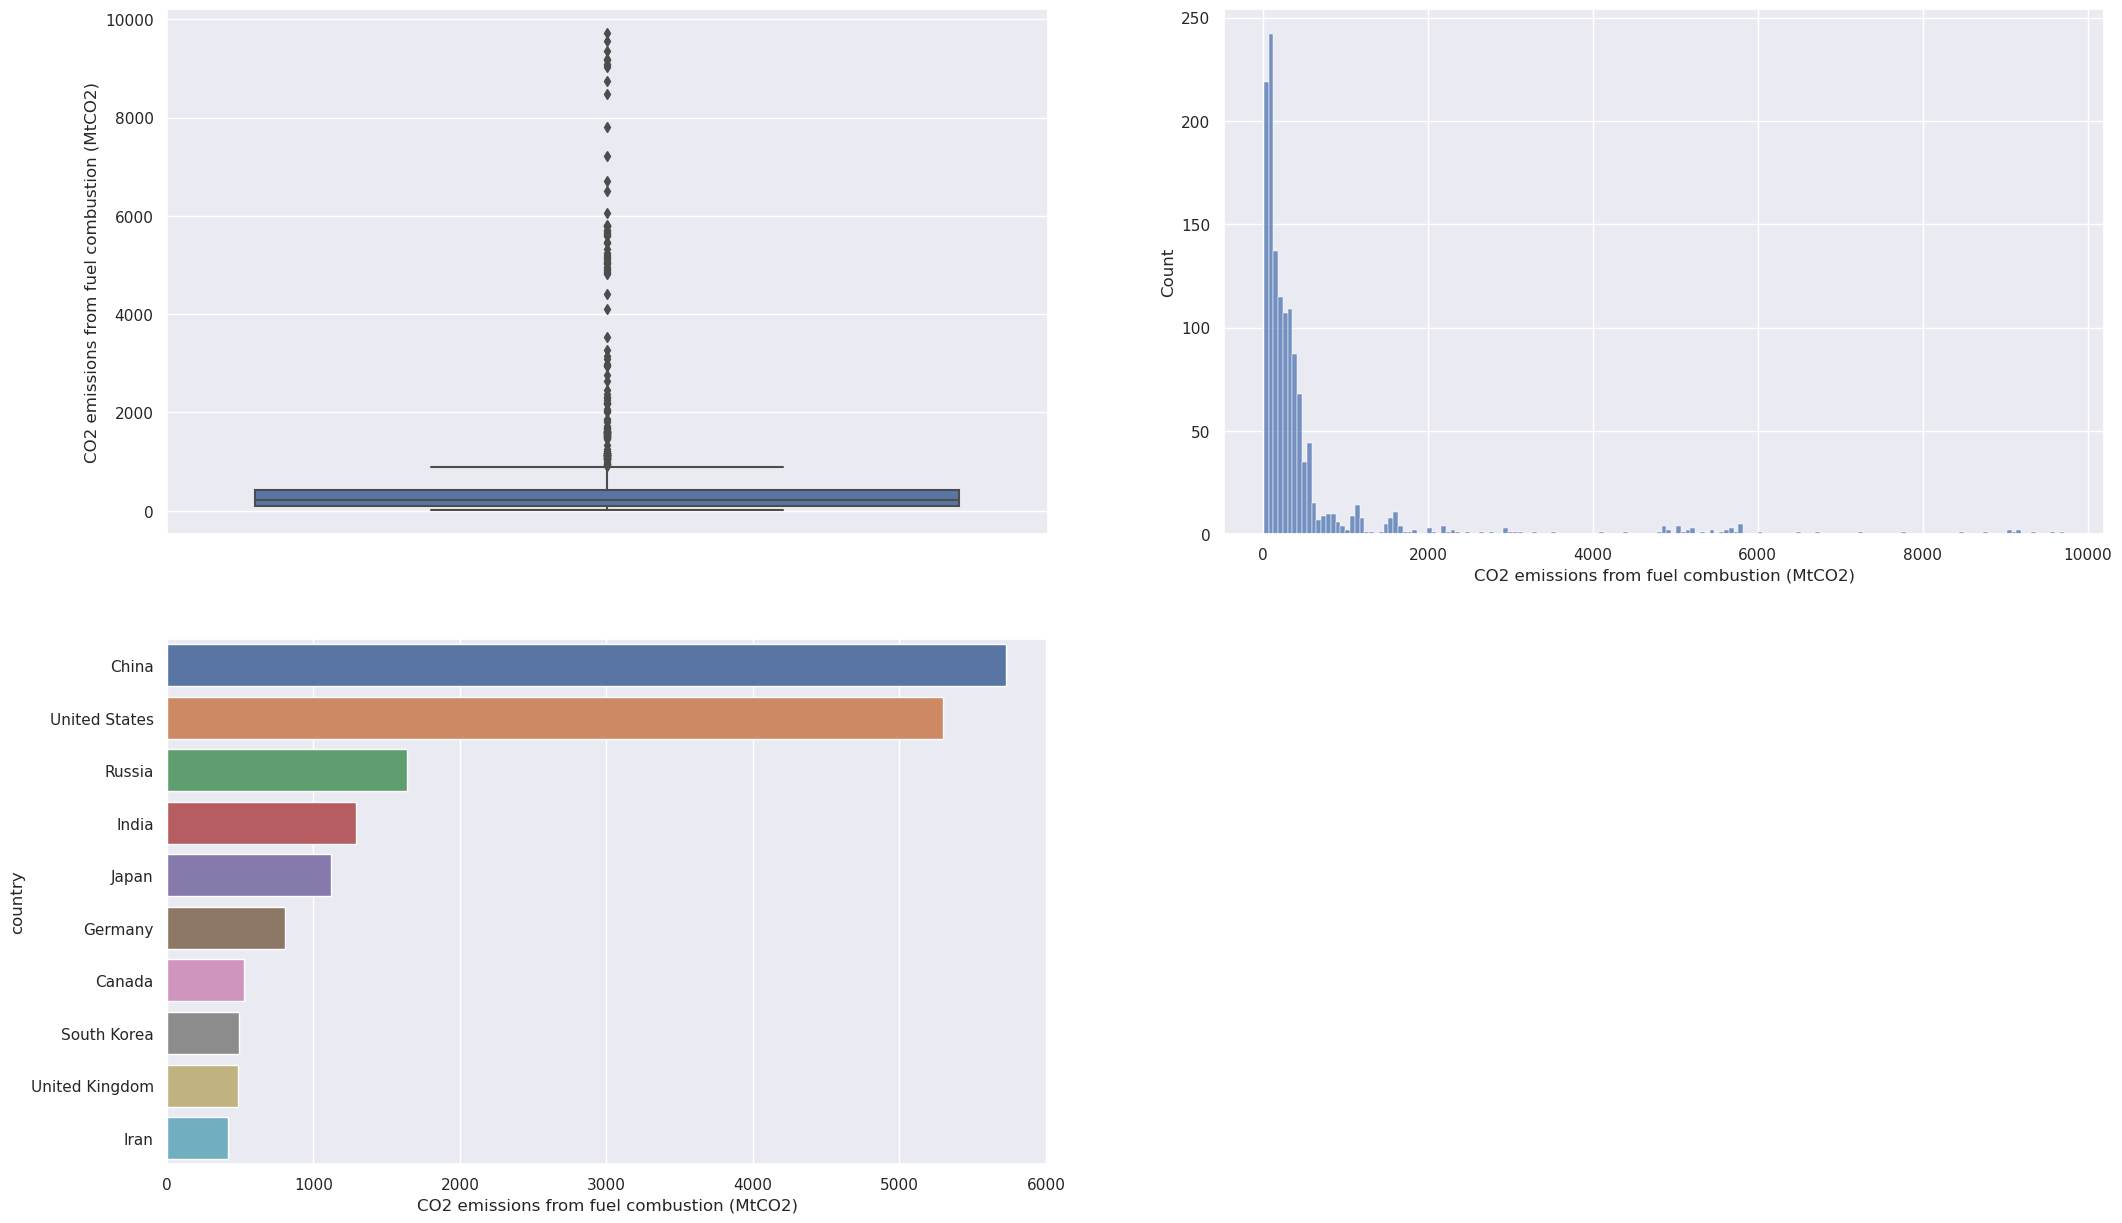

In [20]:
sns.set(rc={'figure.figsize':(25,15)})
plt.subplot(2,2,1)
sns.boxplot(y='CO2 emissions from fuel combustion (MtCO2)',data=df)
plt.subplot(2,2,2)
sns.histplot(x='CO2 emissions from fuel combustion (MtCO2)',data=df)
plt.subplot(2,2,3)
sns.barplot(y='country',x='CO2 emissions from fuel combustion (MtCO2)',data=sortdf,errorbar=None)

* **The Data of CO2 Emission from fuel is highly right skewed (positive skewed)**
* **There are a lots of outliers.**
* **China and USE contributes more in CO2 emission from Fuel Combustion.**

In [21]:
print('China - ',df[df['country']=='China']['CO2 emissions from fuel combustion (MtCO2)'].mean()*100/groupbydf['CO2 emissions from fuel combustion (MtCO2)'].sum())
print('United States - ',df[df['country']=='United States']['CO2 emissions from fuel combustion (MtCO2)'].mean()*100/groupbydf['CO2 emissions from fuel combustion (MtCO2)'].sum())
print('China and United States - ',df[df['country']=='China']['CO2 emissions from fuel combustion (MtCO2)'].mean()*100/groupbydf['CO2 emissions from fuel combustion (MtCO2)'].sum() +
     df[df['country']=='United States']['CO2 emissions from fuel combustion (MtCO2)'].mean()*100/groupbydf['CO2 emissions from fuel combustion (MtCO2)'].sum())

China -  23.638825692273414
United States -  21.8734126486459
China and United States -  45.51223834091931


* **China and United States combined CO2 emissions from fuel Combustion = 45.5% of total emission**
* ****

<Axes: xlabel='Year', ylabel='CO2 emissions from fuel combustion (MtCO2)'>

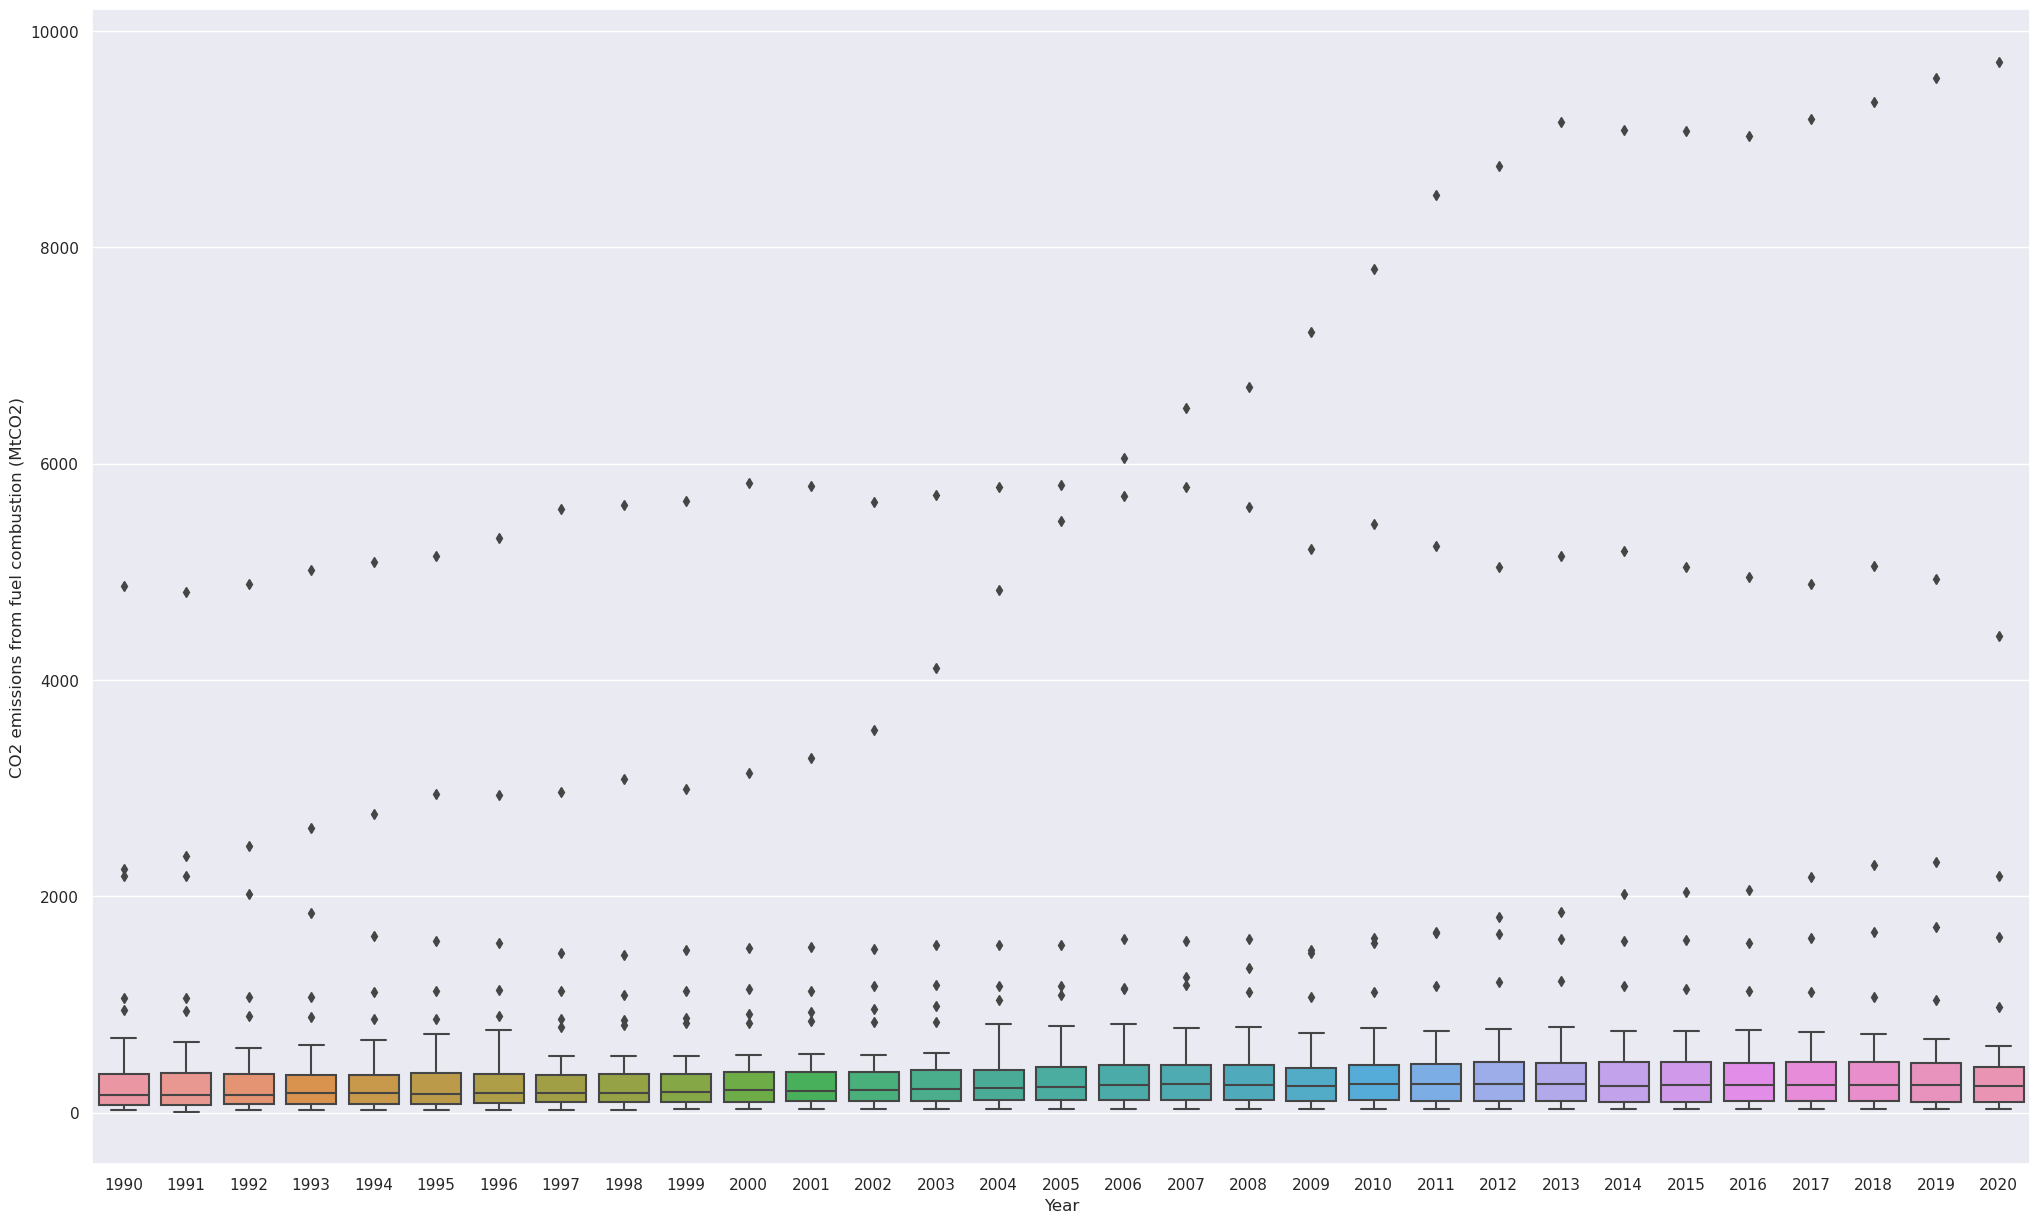

In [22]:
sns.boxplot(x='Year',y='CO2 emissions from fuel combustion (MtCO2)',data=df)

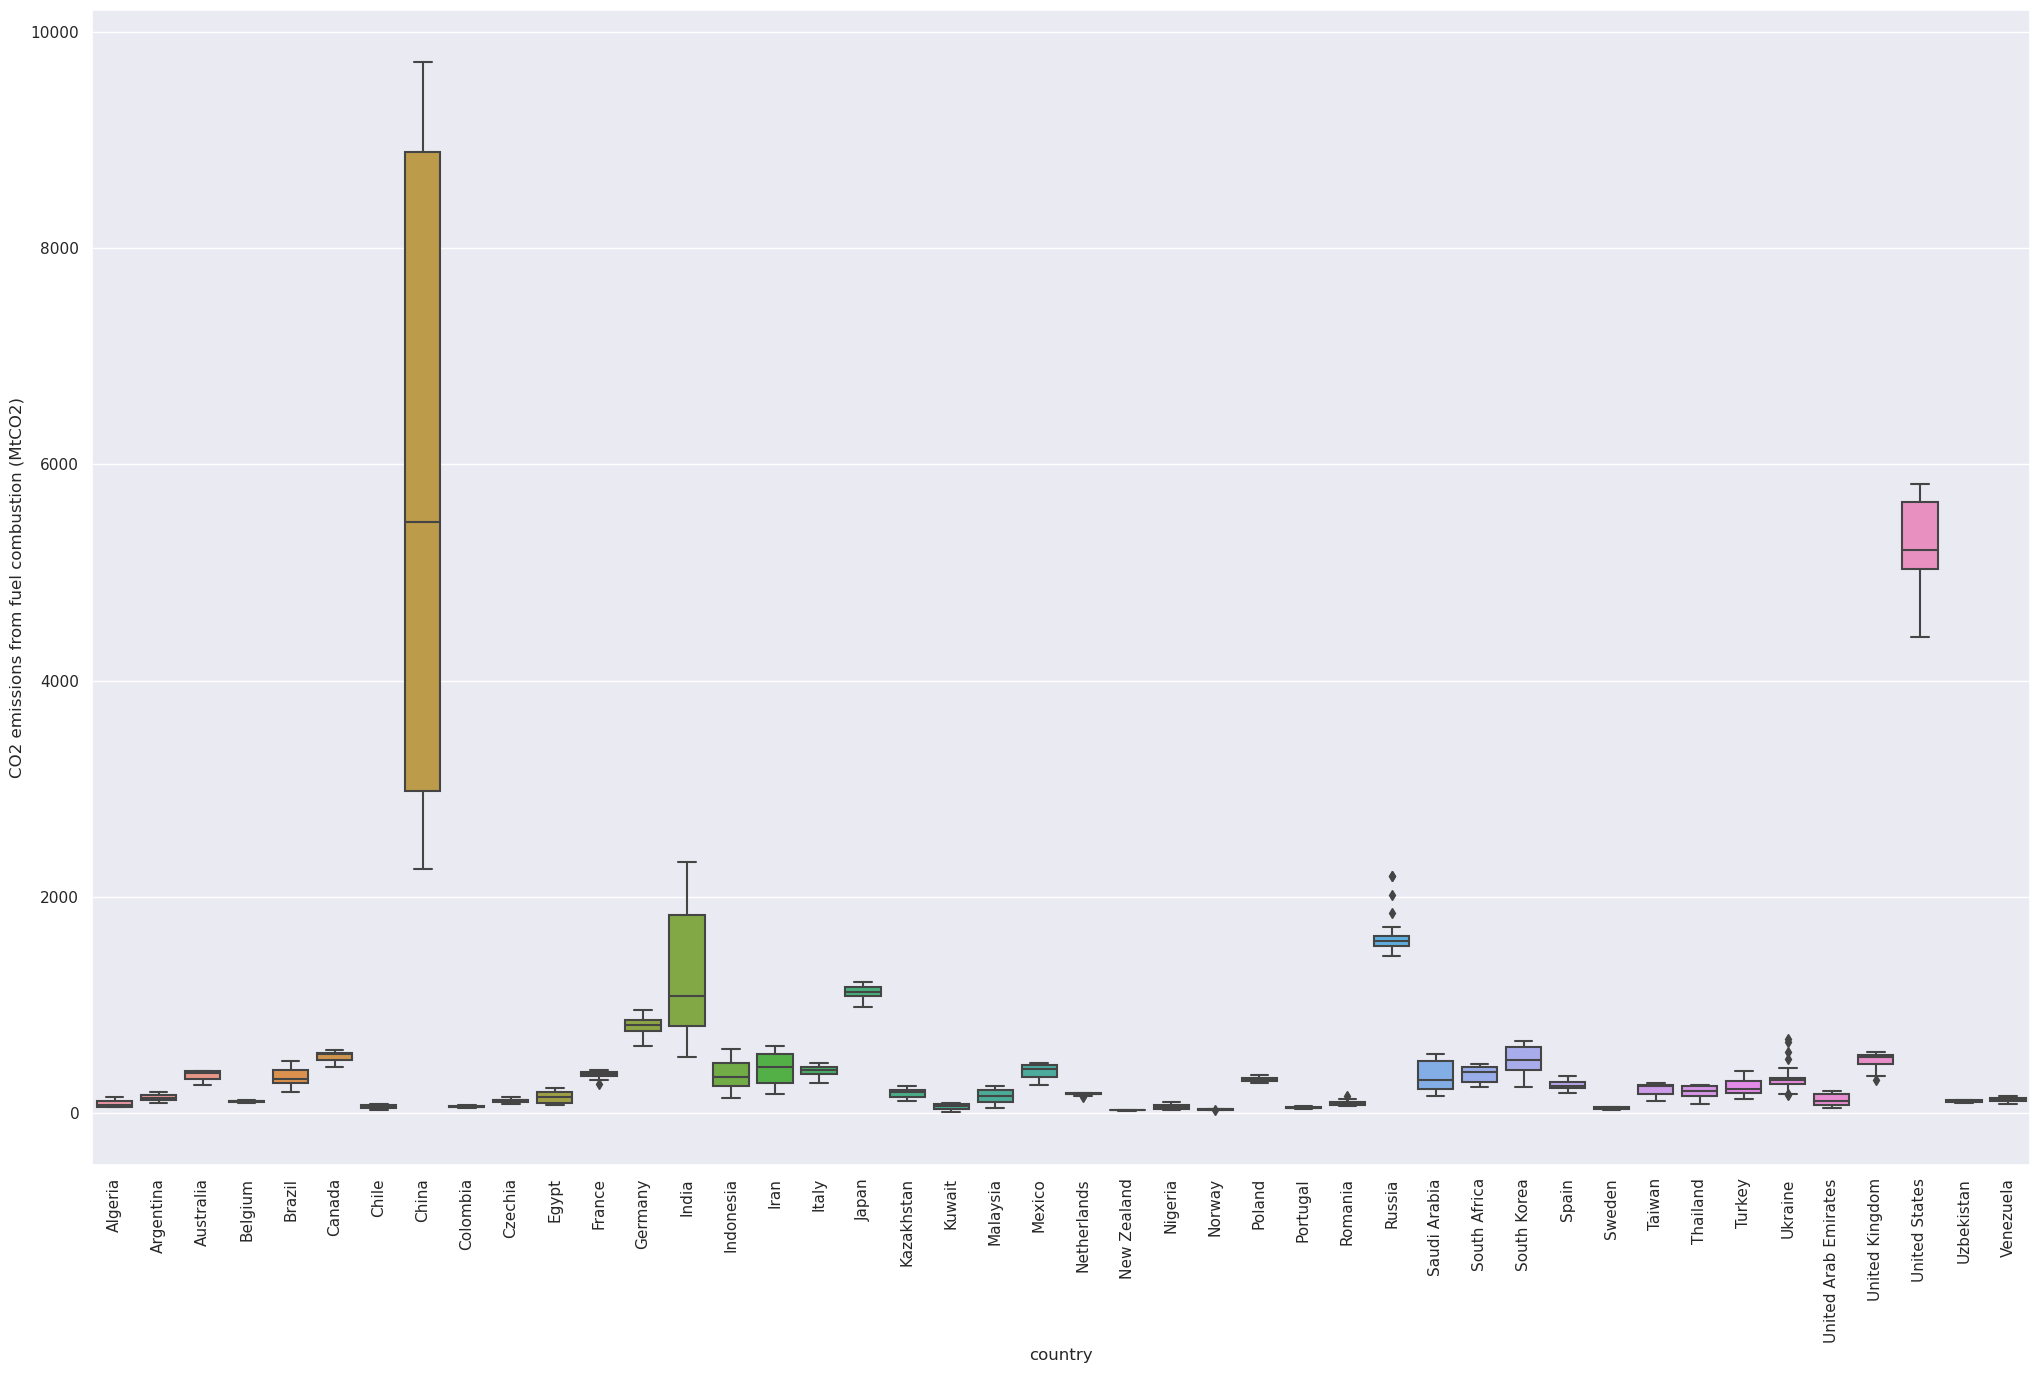

In [23]:
sns.boxplot(x='country',y='CO2 emissions from fuel combustion (MtCO2)',data=df)
plt.xticks(rotation=90);

* **From this visual we can conclude that :**
* **1. Outlier in the data set or Data being highly right skewed is due to China and USA, as see the box plot**
* **2. There is no outlier if we see the data country wise. As a whole it was treated as outlier because few countries contribute to more than 50% of emission**


## Check for column "Electricity production (TWh)"

In [24]:
electricity_prod=pd.DataFrame(df.groupby('country')['Electricity production (TWh)'].mean()).reset_index()
sortdf2=electricity_prod.nlargest(10,'Electricity production (TWh)').sort_values('Electricity production (TWh)',ascending=False)

In [25]:
sortdf2

,country,Electricity production (TWh)
41,United States,4025.543099
7,China,3230.396846
17,Japan,1045.192219
29,Russia,986.532434
13,India,833.085122
5,Canada,601.924855
12,Germany,596.127871
11,France,539.360310
4,Brazil,421.527691
32,South Korea,373.157490


<Axes: xlabel='Electricity production (TWh)', ylabel='country'>

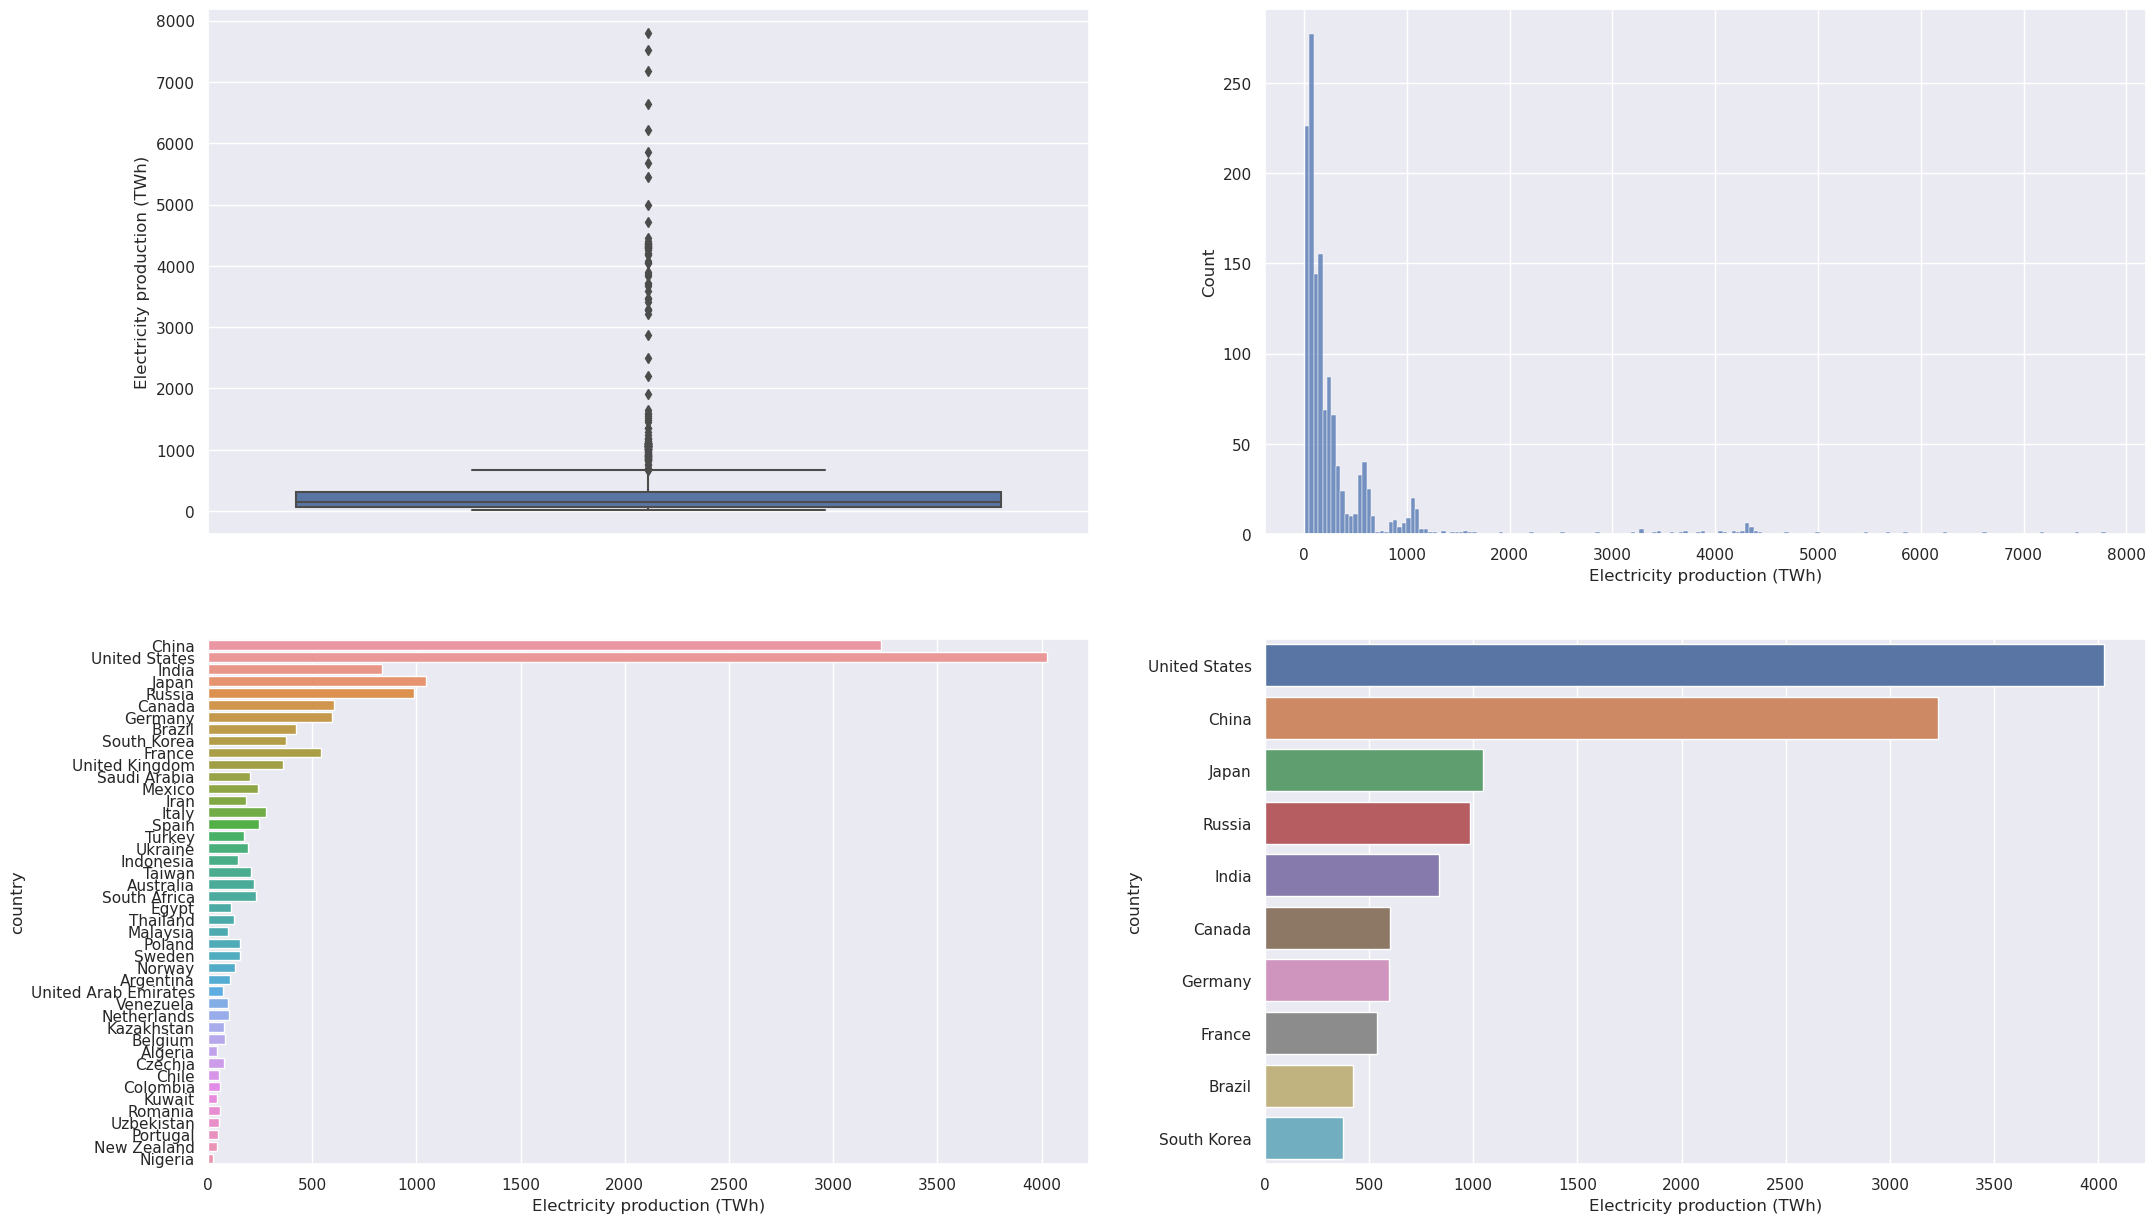

In [26]:
sns.set(rc={'figure.figsize':(25,15)})
plt.subplot(2,2,1)
sns.boxplot(y='Electricity production (TWh)',data=df)
plt.subplot(2,2,2)
sns.histplot(x='Electricity production (TWh)',data=df)
plt.subplot(2,2,3)
sns.barplot(y='country',x='Electricity production (TWh)',data=df.sort_values('Electricity production (TWh)',ascending=False),errorbar=None)
plt.subplot(2,2,4)
sns.barplot(y='country',x='Electricity production (TWh)',data=sortdf2)

In [27]:
print('United States - ',electricity_prod[electricity_prod['country']=='United States']['Electricity production (TWh)'].mean()*100/electricity_prod['Electricity production (TWh)'].sum())
print('United States - ',electricity_prod[electricity_prod['country']=='China']['Electricity production (TWh)'].mean()*100/electricity_prod['Electricity production (TWh)'].sum())
print('United States + China - ',electricity_prod[electricity_prod['country']=='United States']['Electricity production (TWh)'].mean()*100/electricity_prod['Electricity production (TWh)'].sum()
     + electricity_prod[electricity_prod['country']=='China']['Electricity production (TWh)'].mean()*100/electricity_prod['Electricity production (TWh)'].sum())

United States -  23.54452553837455
United States -  18.893888142379126
United States + China -  42.438413680753676


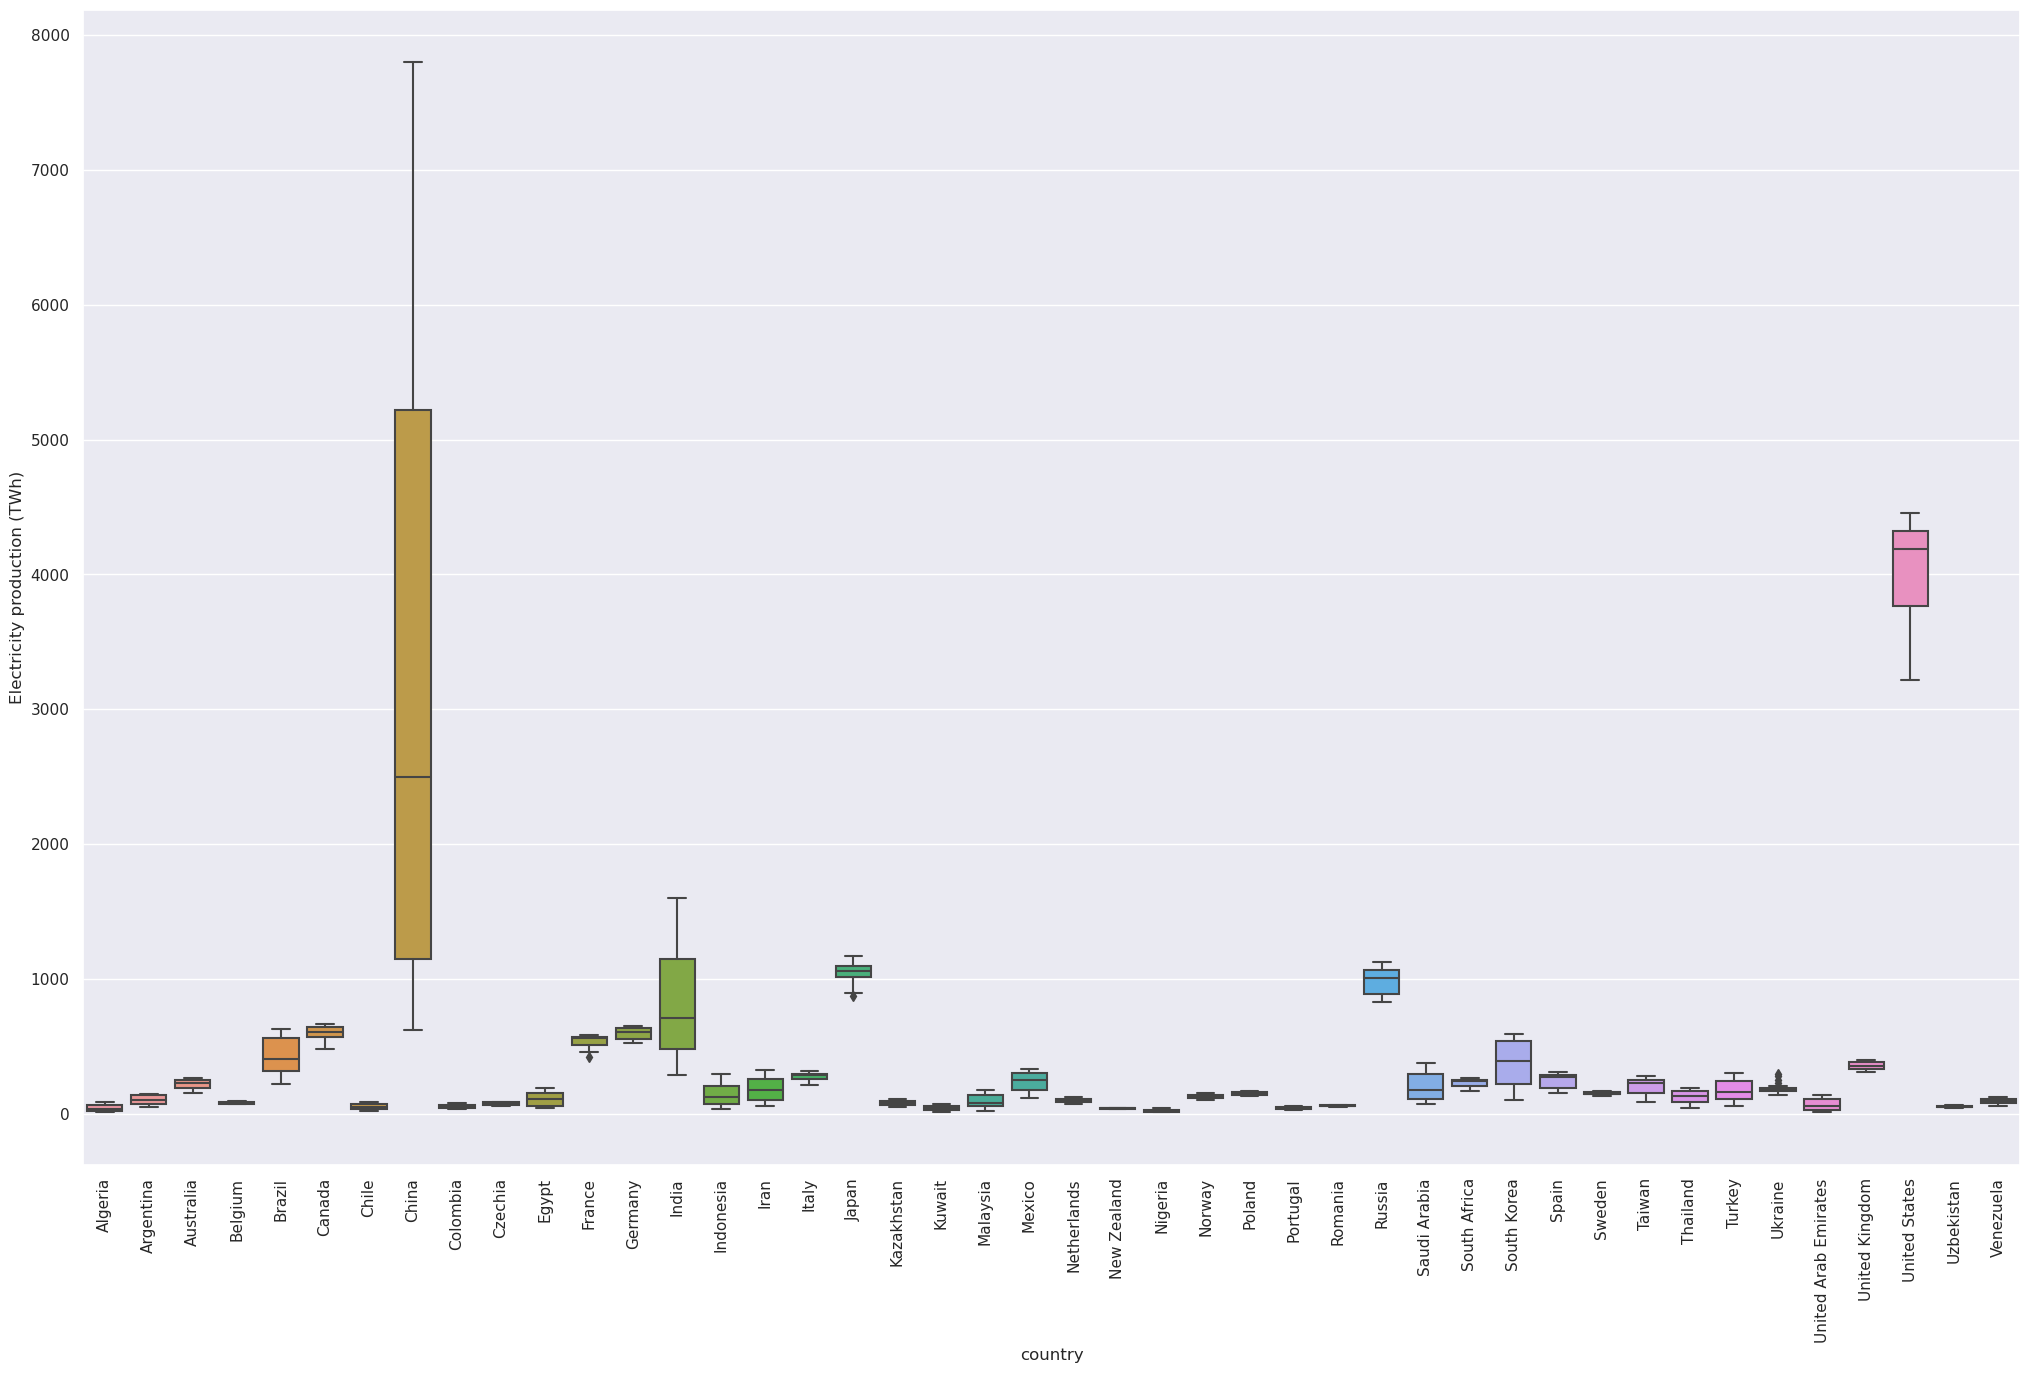

In [28]:
sns.boxplot(x='country',y='Electricity production (TWh)',data=df)
plt.xticks(rotation=90);

* **From this visual we can conclude that :**
* **1. Outlier in the data set or Data being highly right skewed is due to China and USA, as see the box plot**
* **2. There is no outlier if we see the data country wise. As a whole it was treated as outlier because few countries contribute to more than 50% of electricity production**

# Analysis Country Wise

### Data of China, United States, India, Russia contributes to the outliers of whole data. Let's study about these countries in Details

In [29]:
countries_of_interest = ['China', 'India', 'Russia', 'United States']
ICD = df[df['country'].isin(countries_of_interest)] # ICD - Interested Country Data

<Axes: xlabel='country', ylabel='Electricity production (TWh)'>

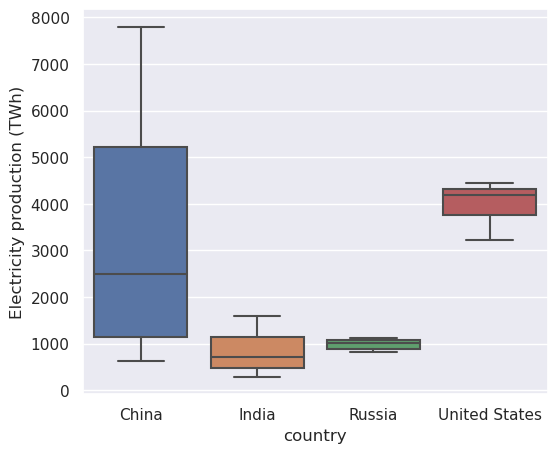

In [30]:
plt.figure(figsize=(6,5))
sns.boxplot(x='country',y='Electricity production (TWh)',data=ICD)

## Total Energy Production of Interested Countries

<Axes: title={'center': 'Energy production of Countries'}, xlabel='Year', ylabel='Total energy production (Mtoe)'>

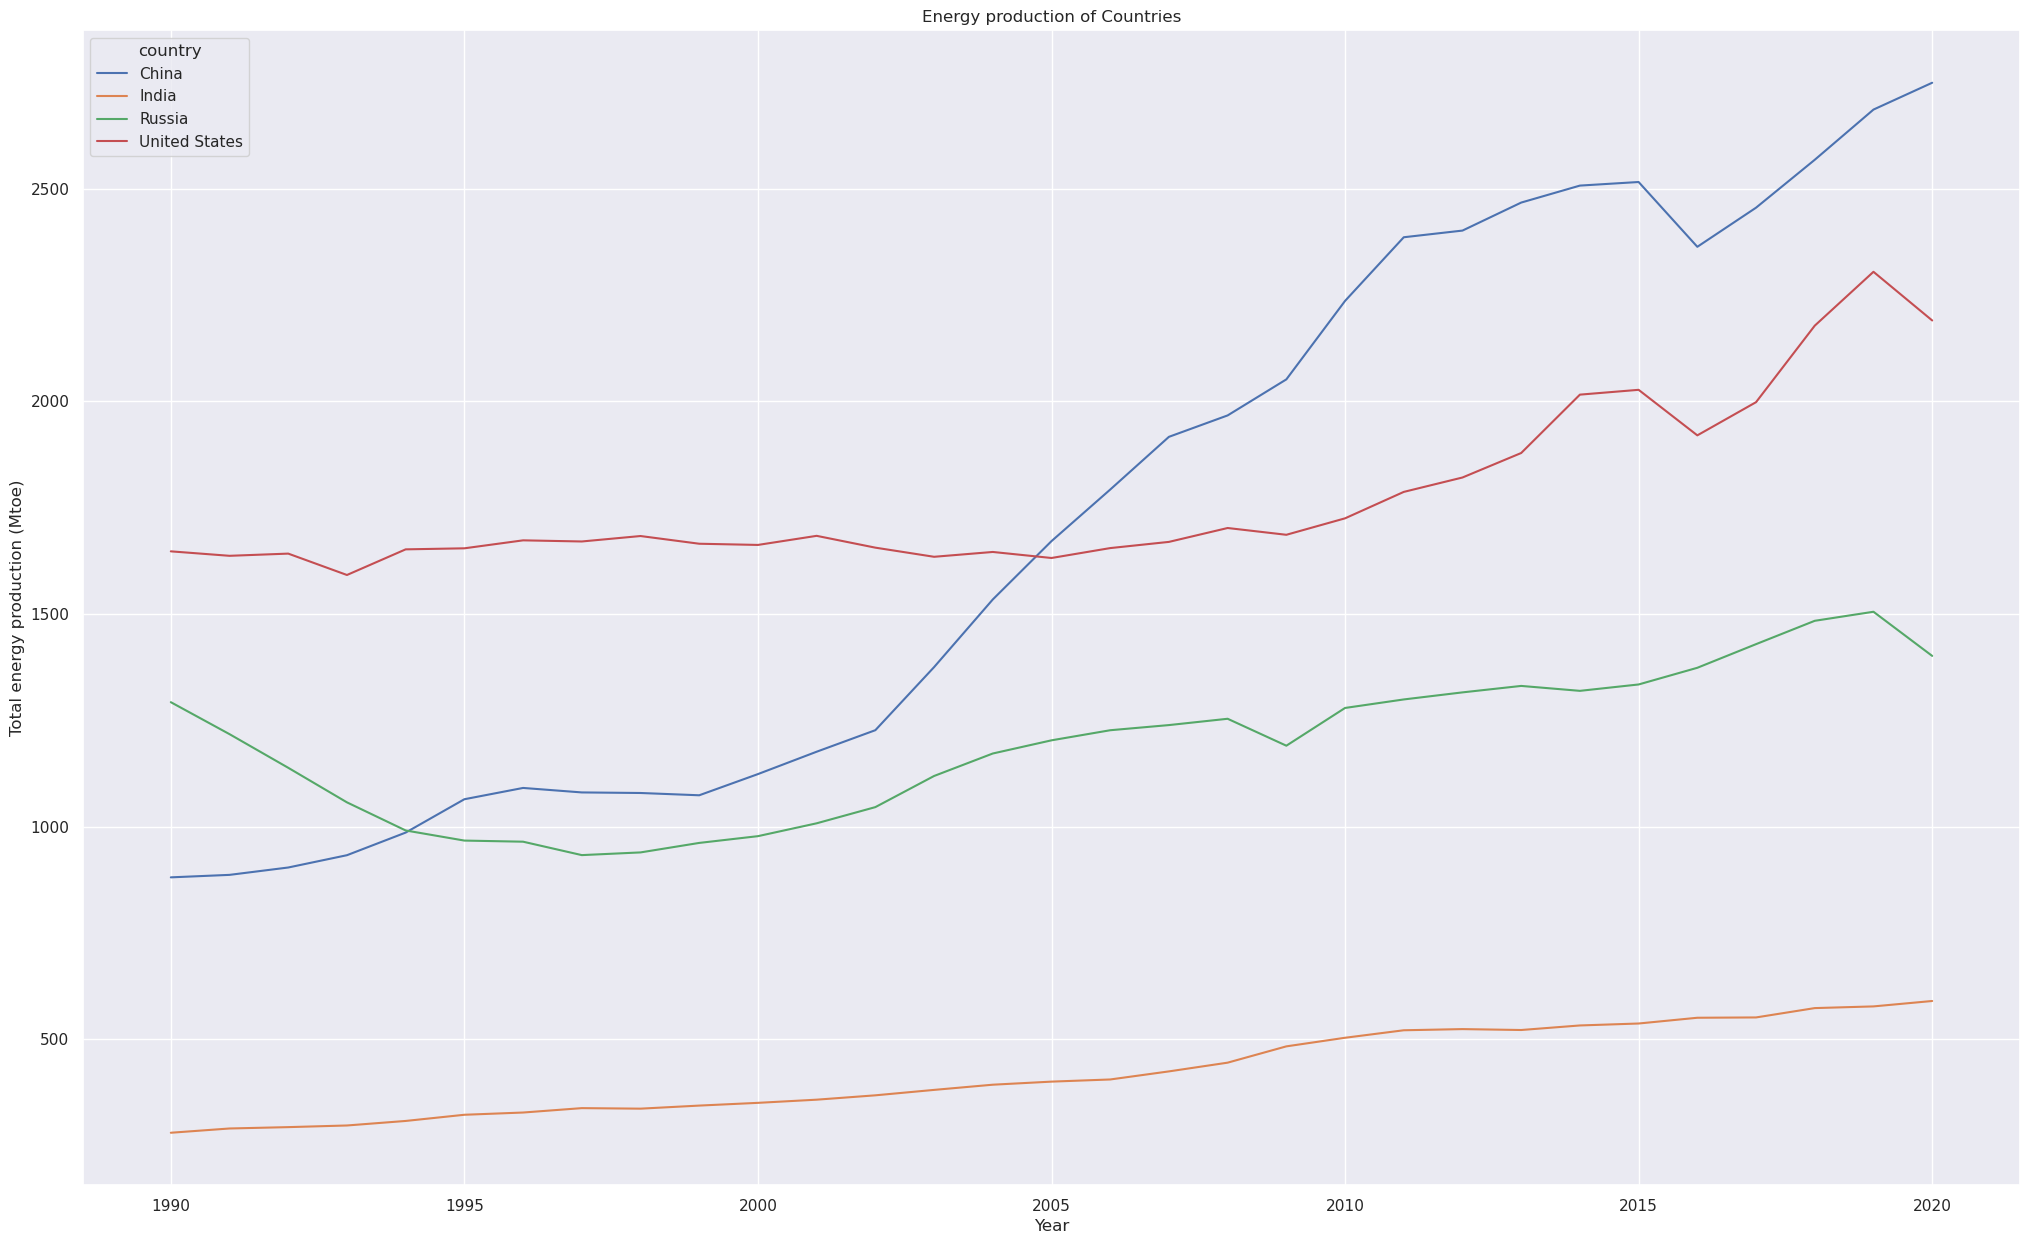

In [31]:
plt.title('Energy production of Countries')
sns.lineplot(x='Year',y='Total energy production (Mtoe)',data=ICD, hue='country')

## Electricity production (TWh) of Interested Countries

<Axes: title={'center': 'Energy production of Countries'}, xlabel='Year', ylabel='Electricity production (TWh)'>

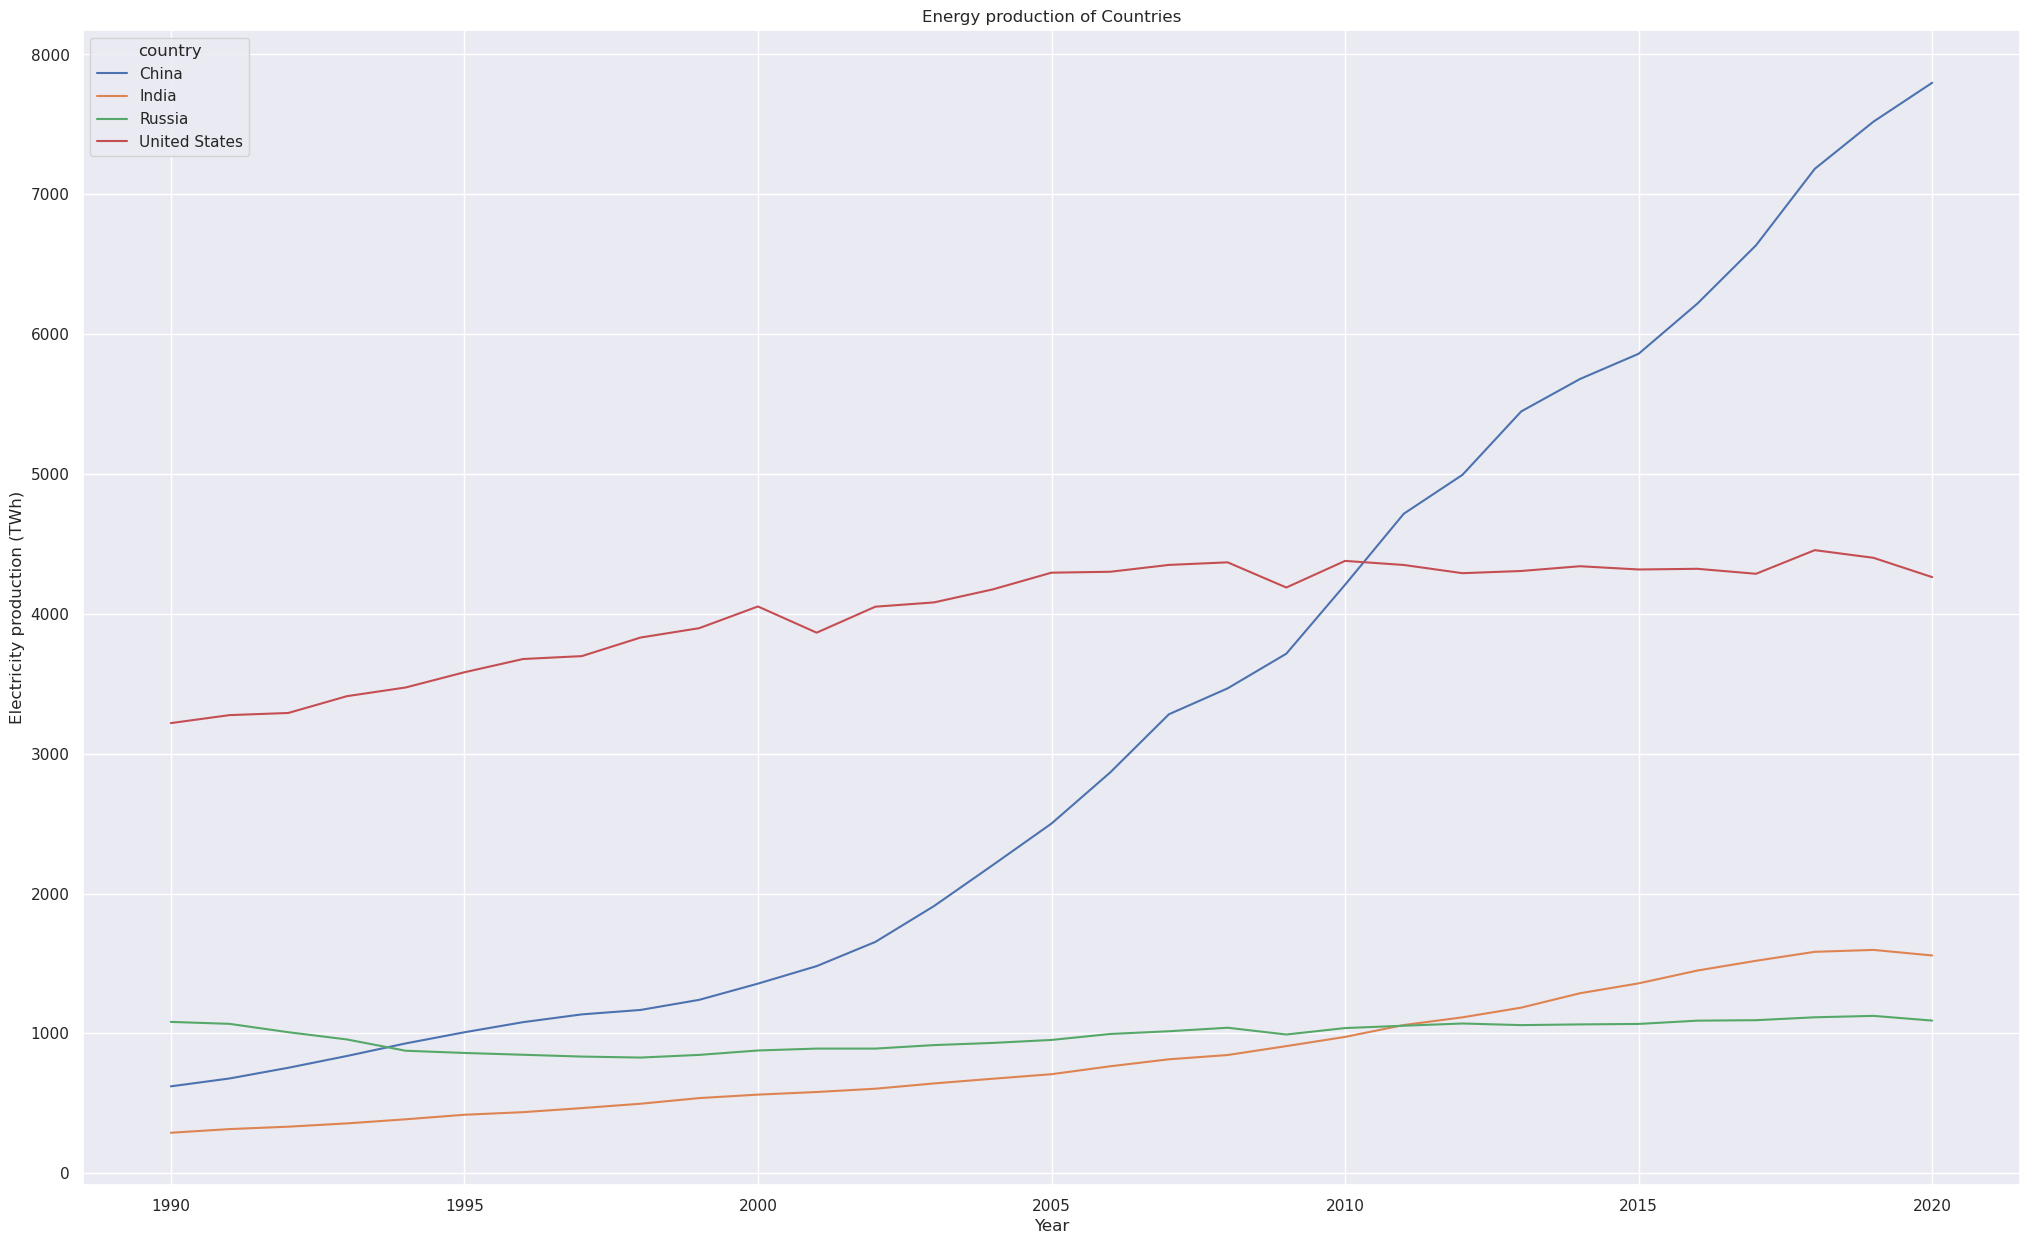

In [32]:
plt.title('Energy production of Countries')
sns.lineplot(x='Year',y='Electricity production (TWh)',data=ICD, hue='country')

## Renewable share Electricity production of Interested Countries

<Axes: title={'center': 'Share of Renewables in Electricity production of Countries'}, xlabel='Year', ylabel='Share of renewables in electricity production (%)'>

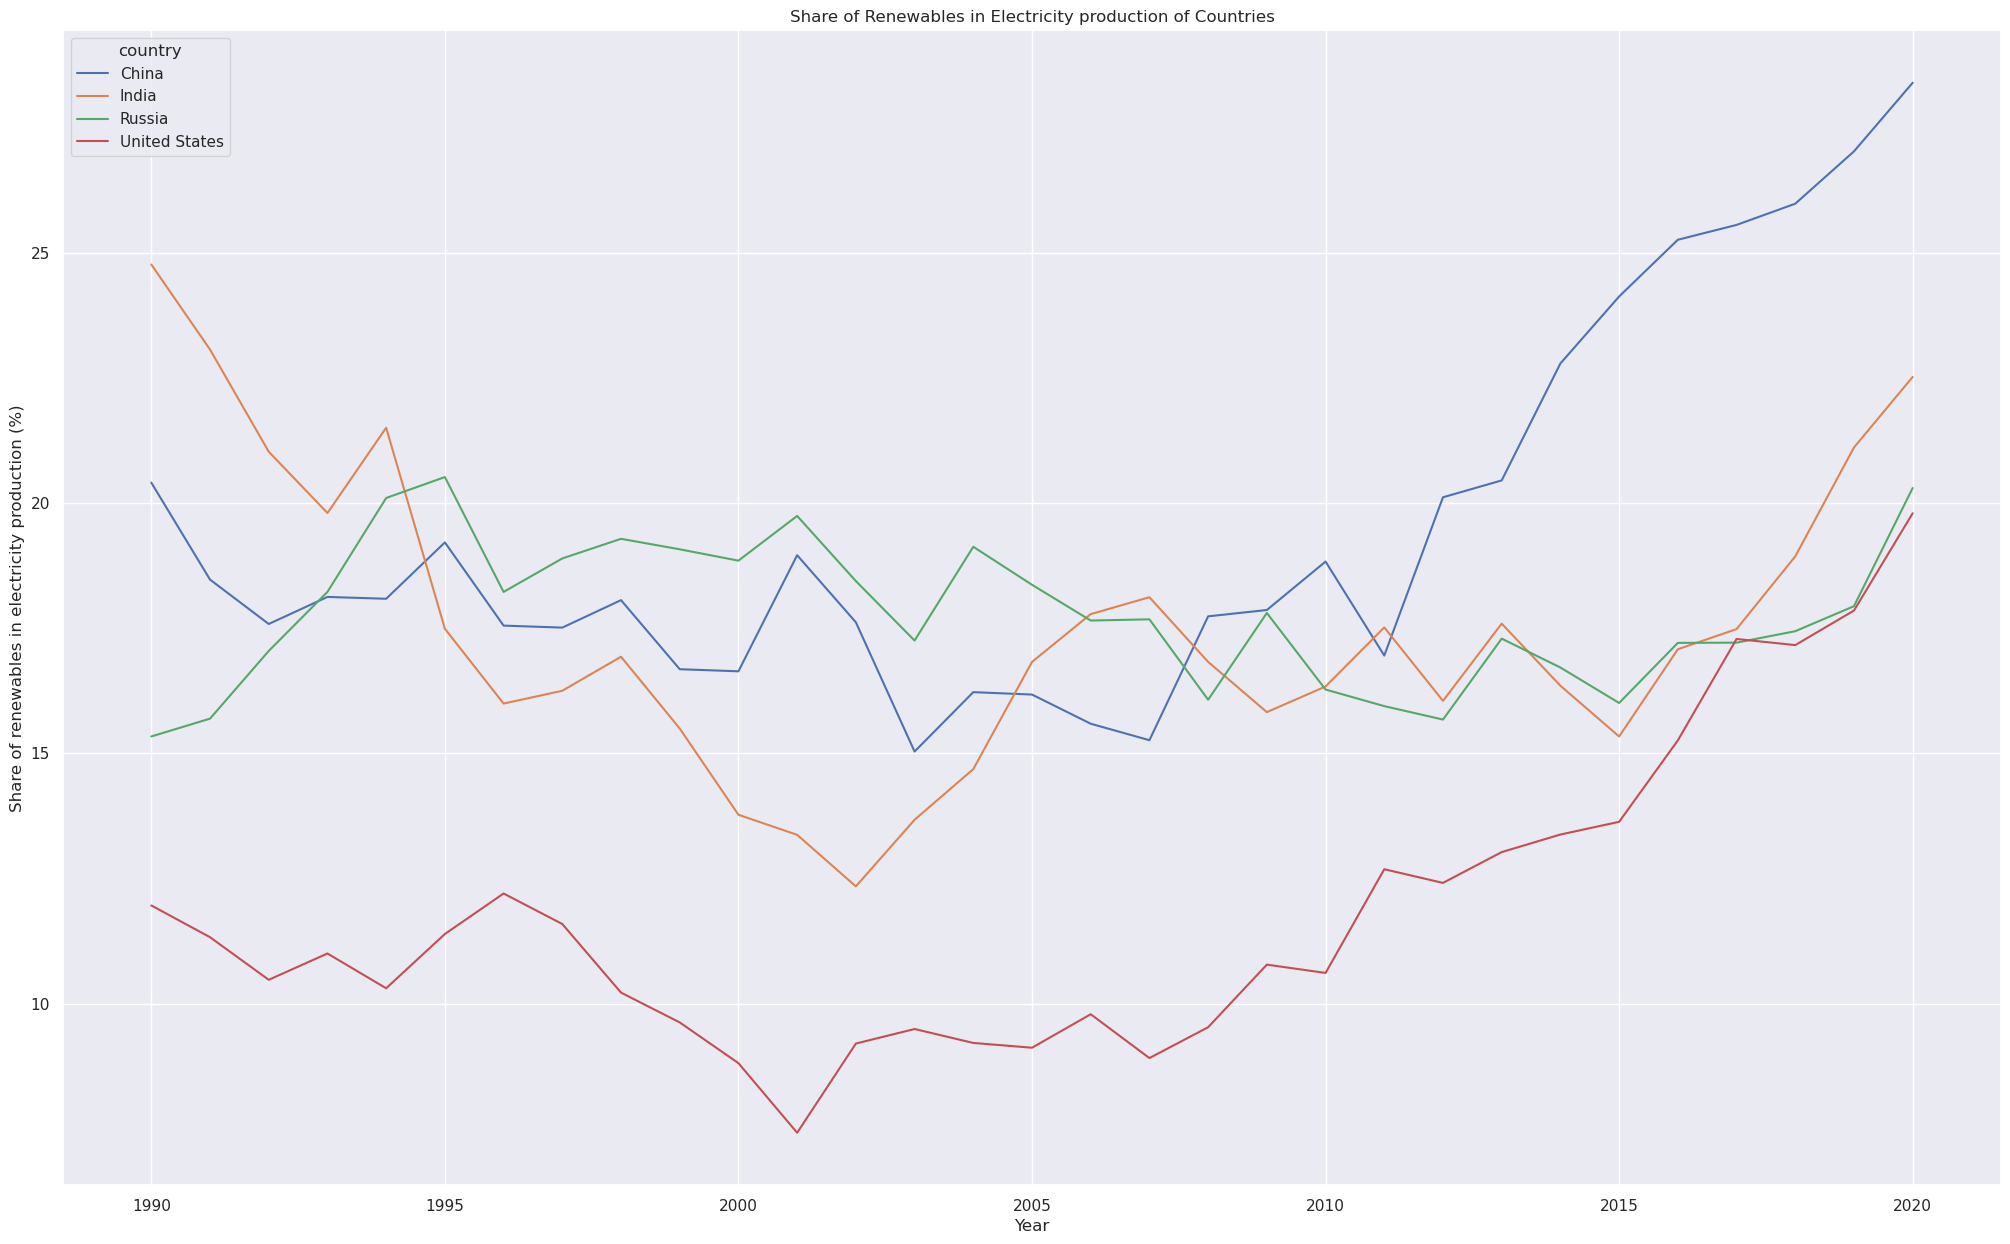

In [33]:
plt.title('Share of Renewables in Electricity production of Countries')
sns.lineplot(x='Year',y='Share of renewables in electricity production (%)',data=ICD, hue='country')

# India

In [34]:
Indiadf=df[df['country']=='India']

In [35]:
Indiadf.head()

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
403,India,1990,Asia & Pacific,523.096893,1.711269,0.330350,280.491205,305.677685,24.765261,7.391381,56.449,52.201,12.765992,12.944002,0.193044,289.470,211.766,218.234740,0.011055,34.555,225.258
404,India,1991,Asia & Pacific,562.048195,1.764870,0.351237,290.513654,318.464315,23.066420,7.853157,58.392,52.213,14.440992,14.490033,0.199016,315.671,232.033,236.717623,0.012355,32.574,245.007
405,India,1992,Asia & Pacific,594.465554,1.800821,0.352187,293.713500,330.108152,21.025905,8.171420,60.589,54.435,16.115992,16.700018,0.195570,332.799,247.451,251.135081,0.026442,29.518,255.229
406,India,1993,Asia & Pacific,625.865613,1.851429,0.353973,297.574727,338.044637,19.801194,8.716353,62.529,55.305,16.340005,17.094003,0.191189,356.428,266.146,265.246647,0.027776,29.742,262.291
407,India,1994,Asia & Pacific,666.503092,1.898860,0.353422,308.234531,351.001673,21.504515,9.125386,68.050,57.490,17.338006,18.176980,0.186123,385.626,289.569,280.487180,0.051864,34.915,271.725


<Axes: title={'center': 'Share of renewables in electricity production of INDIA'}, xlabel='Year', ylabel='Share of renewables in electricity production (%)'>

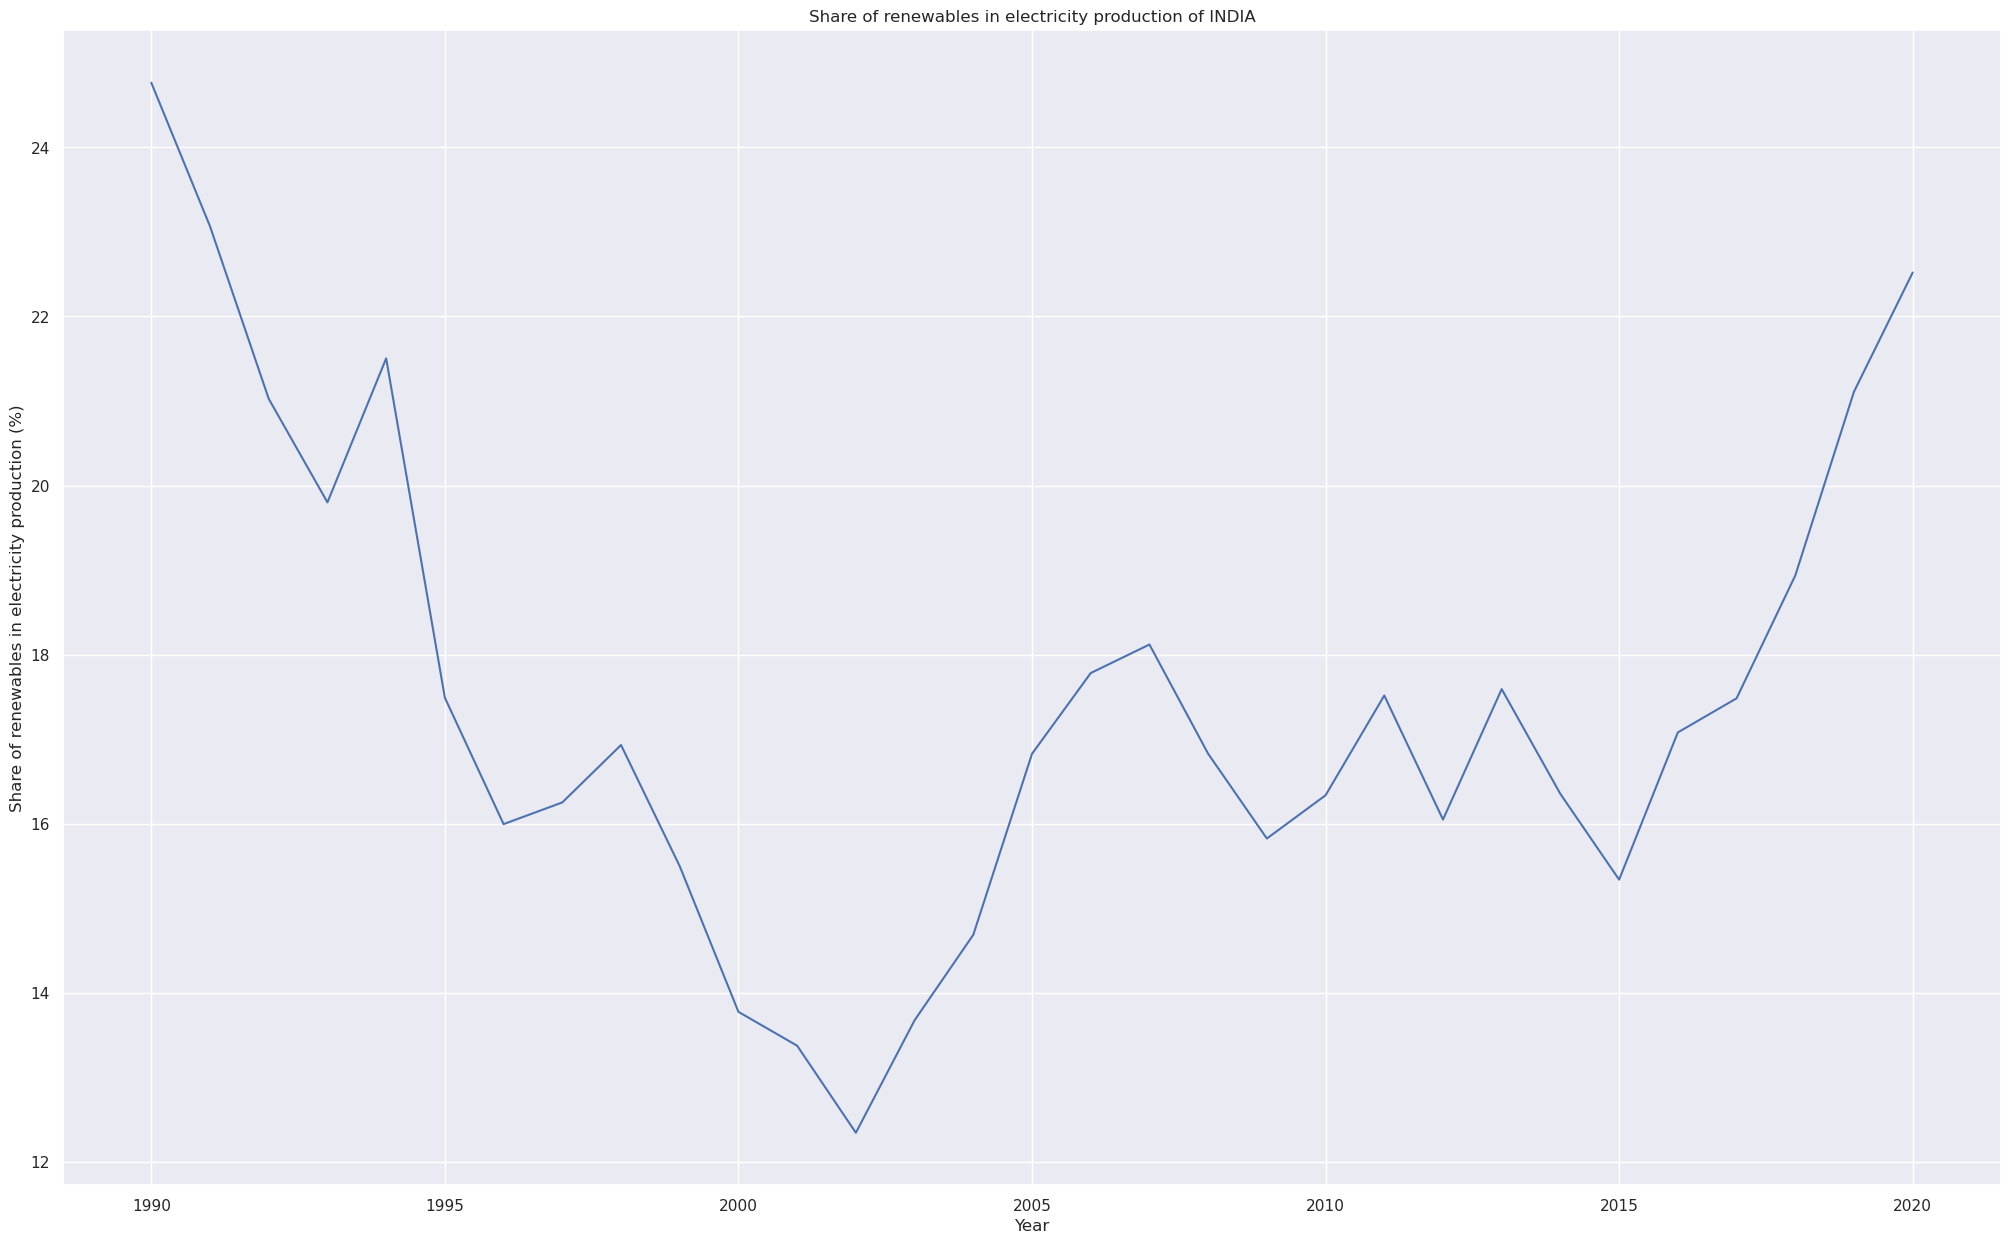

In [36]:
plt.title('Share of renewables in electricity production of INDIA')
sns.lineplot(x='Year',y='Share of renewables in electricity production (%)',data=Indiadf[Indiadf['country']=='India'])

<Axes: xlabel='Year', ylabel='CO2 emissions from fuel combustion (MtCO2)'>

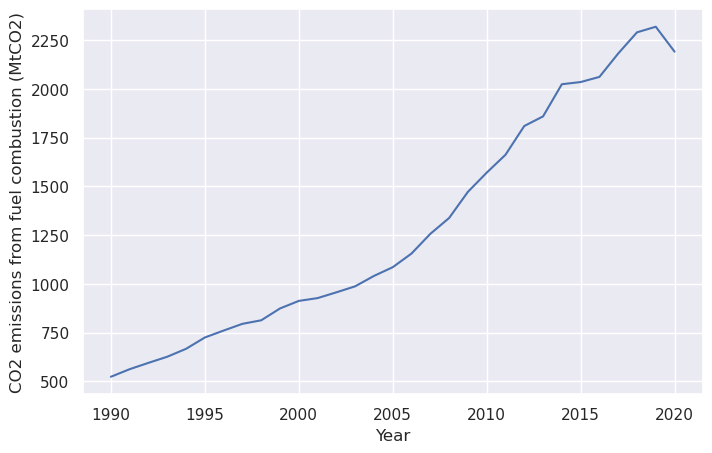

In [92]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Year',y='CO2 emissions from fuel combustion (MtCO2)',data=Indiadf)

<Axes: title={'center': 'Total Energy Consumption'}, xlabel='Year', ylabel='Total energy consumption (Mtoe)'>

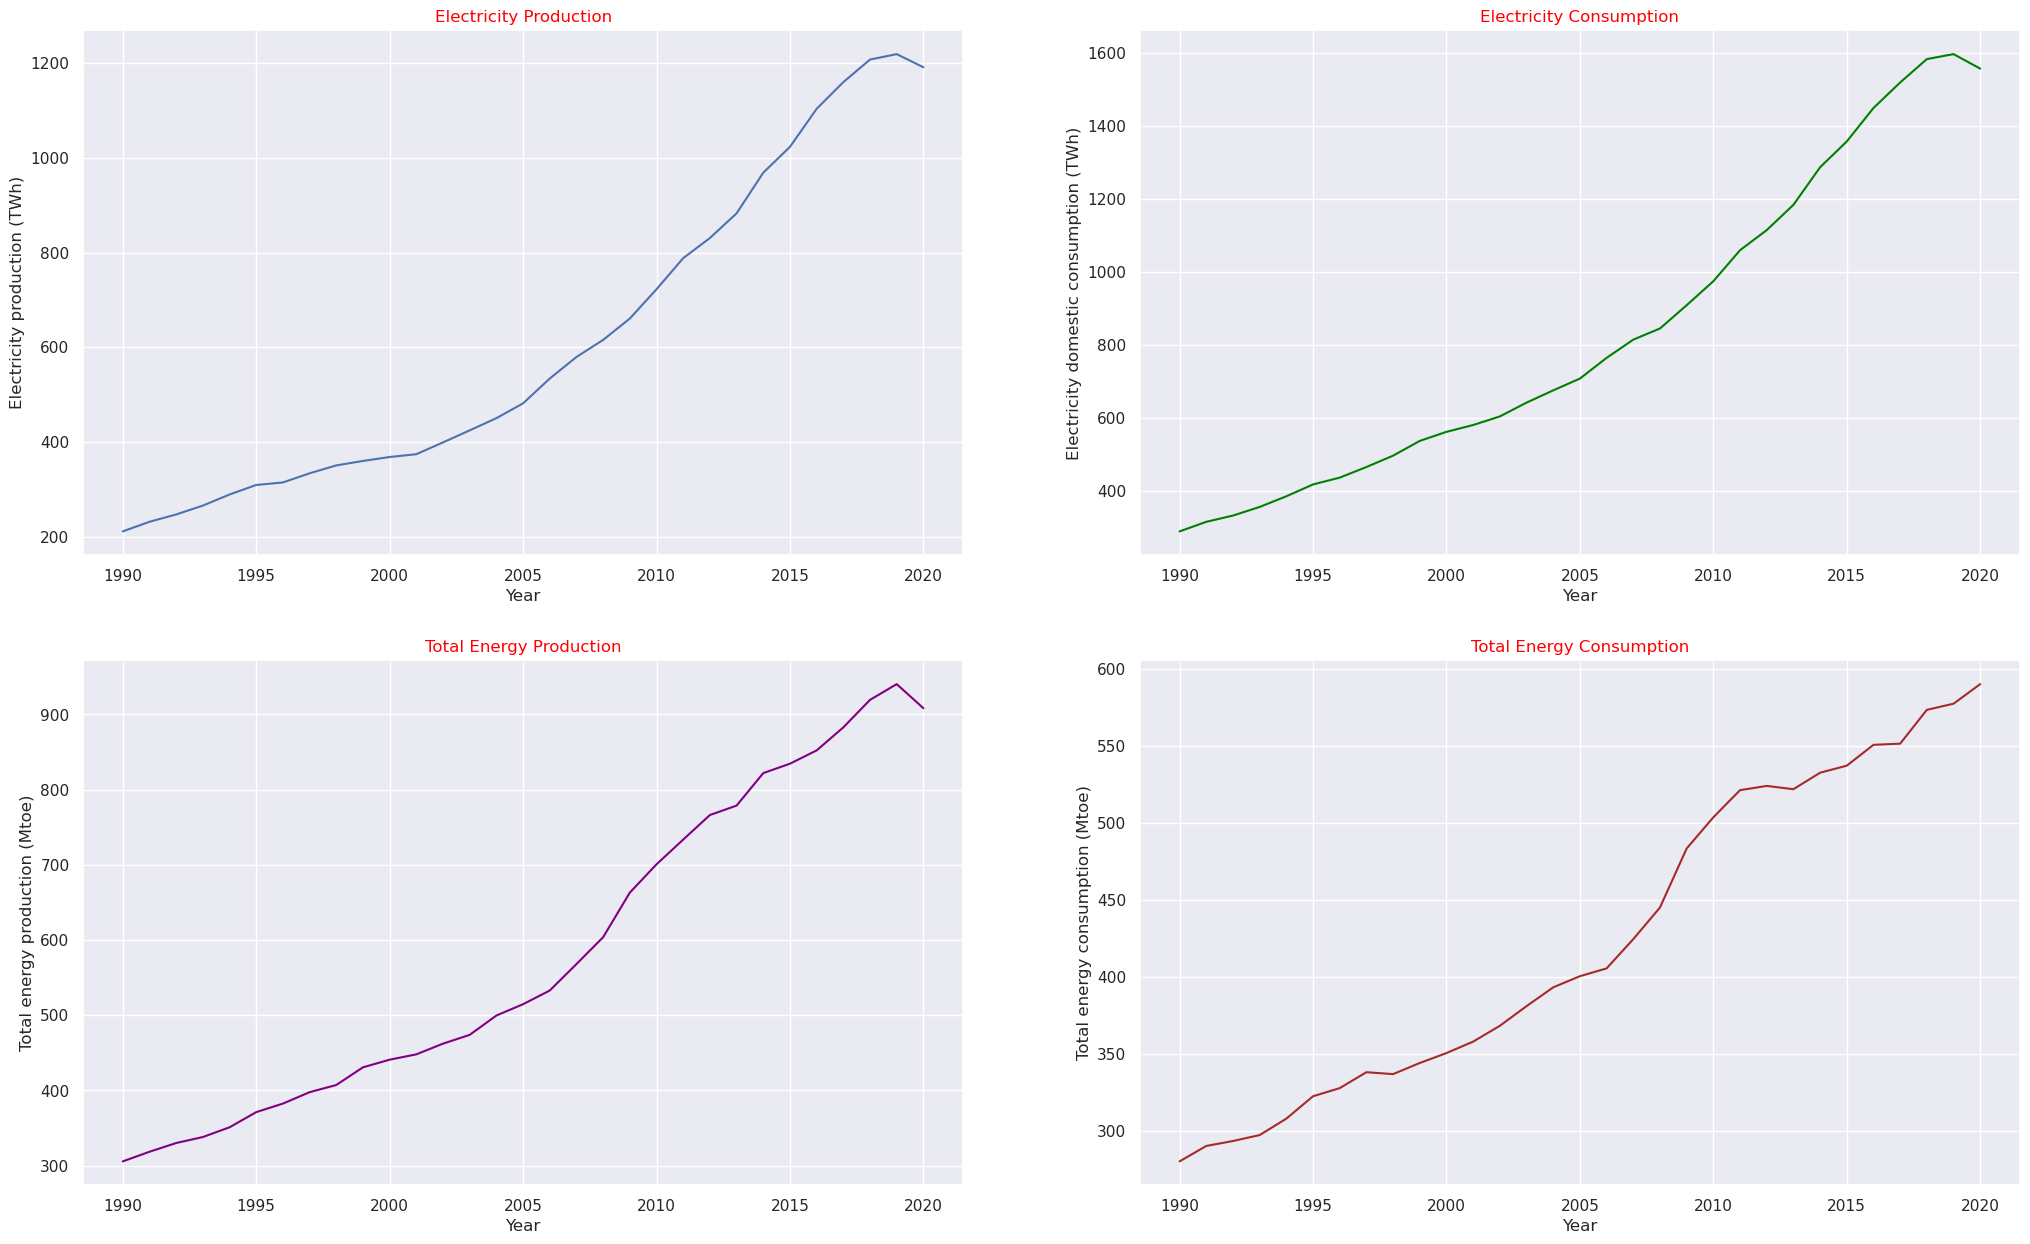

In [97]:
plt.subplot(2,2,1)
plt.title('Electricity Production',color='red')
sns.lineplot(x='Year',y='Electricity production (TWh)',data=Indiadf)
plt.subplot(2,2,2)
plt.title('Electricity Consumption',color='red')
sns.lineplot(x='Year',y='Electricity domestic consumption (TWh)',data=Indiadf,color='green')
plt.subplot(2,2,3)
plt.title('Total Energy Production', color='red')
sns.lineplot(x='Year',y='Total energy production (Mtoe)',data=Indiadf,color='purple')
plt.subplot(2,2,4)
plt.title('Total Energy Consumption', color='red')
sns.lineplot(x='Year',y='Total energy consumption (Mtoe)',data=Indiadf,color='brown')

In [68]:
Indiadf=Indiadf.copy()
Indiadf.rename(columns={'Electricity production (TWh)':'Electricity domestic consumption (TWh)','Electricity domestic consumption (TWh)':'Electricity production (TWh)'},inplace=True)

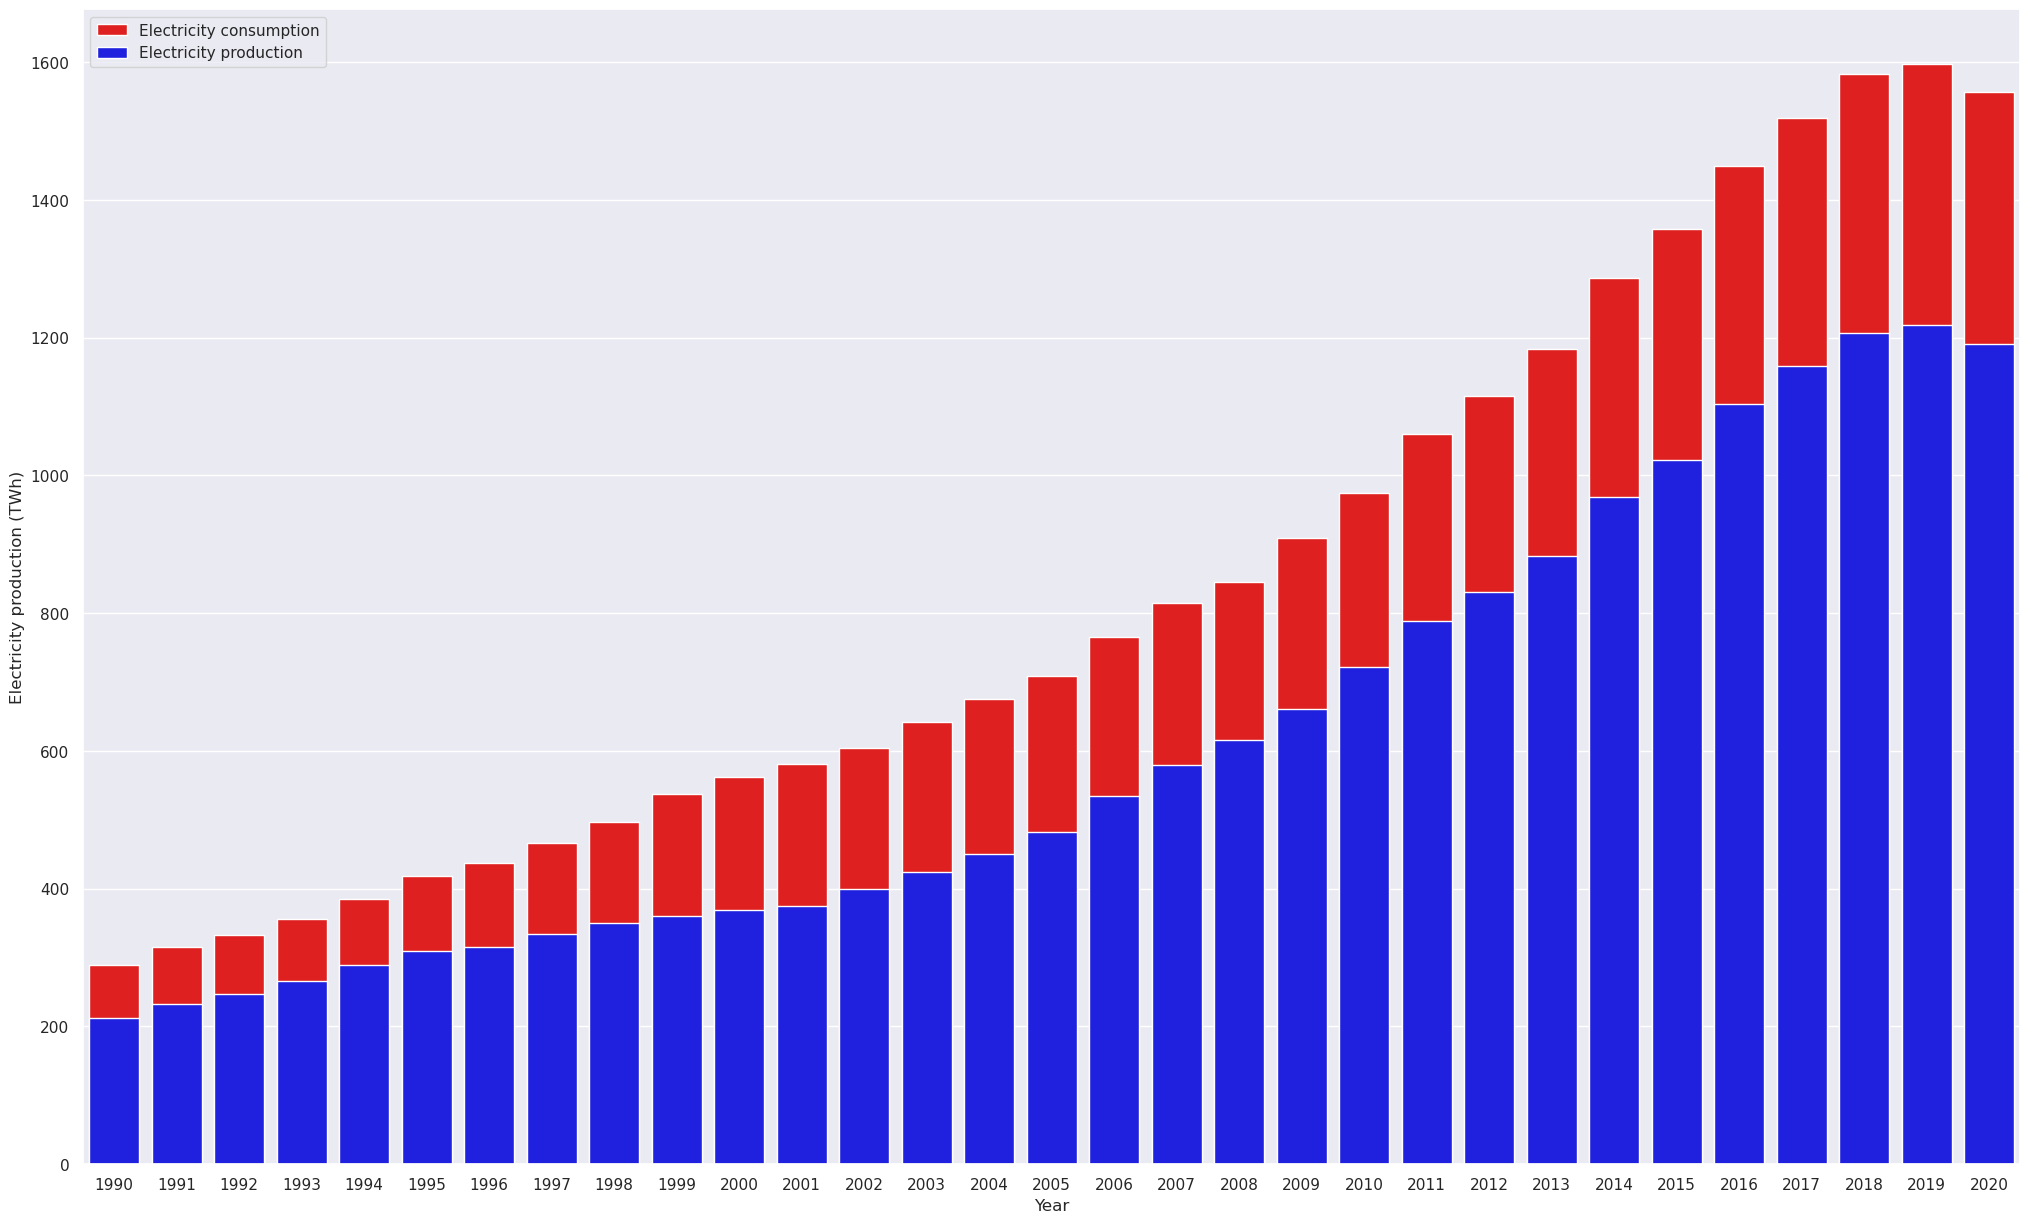

In [70]:
sns.barplot(x='Year',y='Electricity domestic consumption (TWh)',color='red',data=Indiadf,label='Electricity consumption')
sns.barplot(x='Year',y='Electricity production (TWh)',data=Indiadf,color='blue',label='Electricity production')
plt.legend()
plt.show()

* **Electricity production is less than the total Consumption**

In [71]:
Indiadf=Indiadf.copy()
Indiadf.rename(columns={'Total energy consumption (Mtoe)':'Total energy production (Mtoe)','Total energy production (Mtoe)':'Total energy consumption (Mtoe)'},inplace=True)

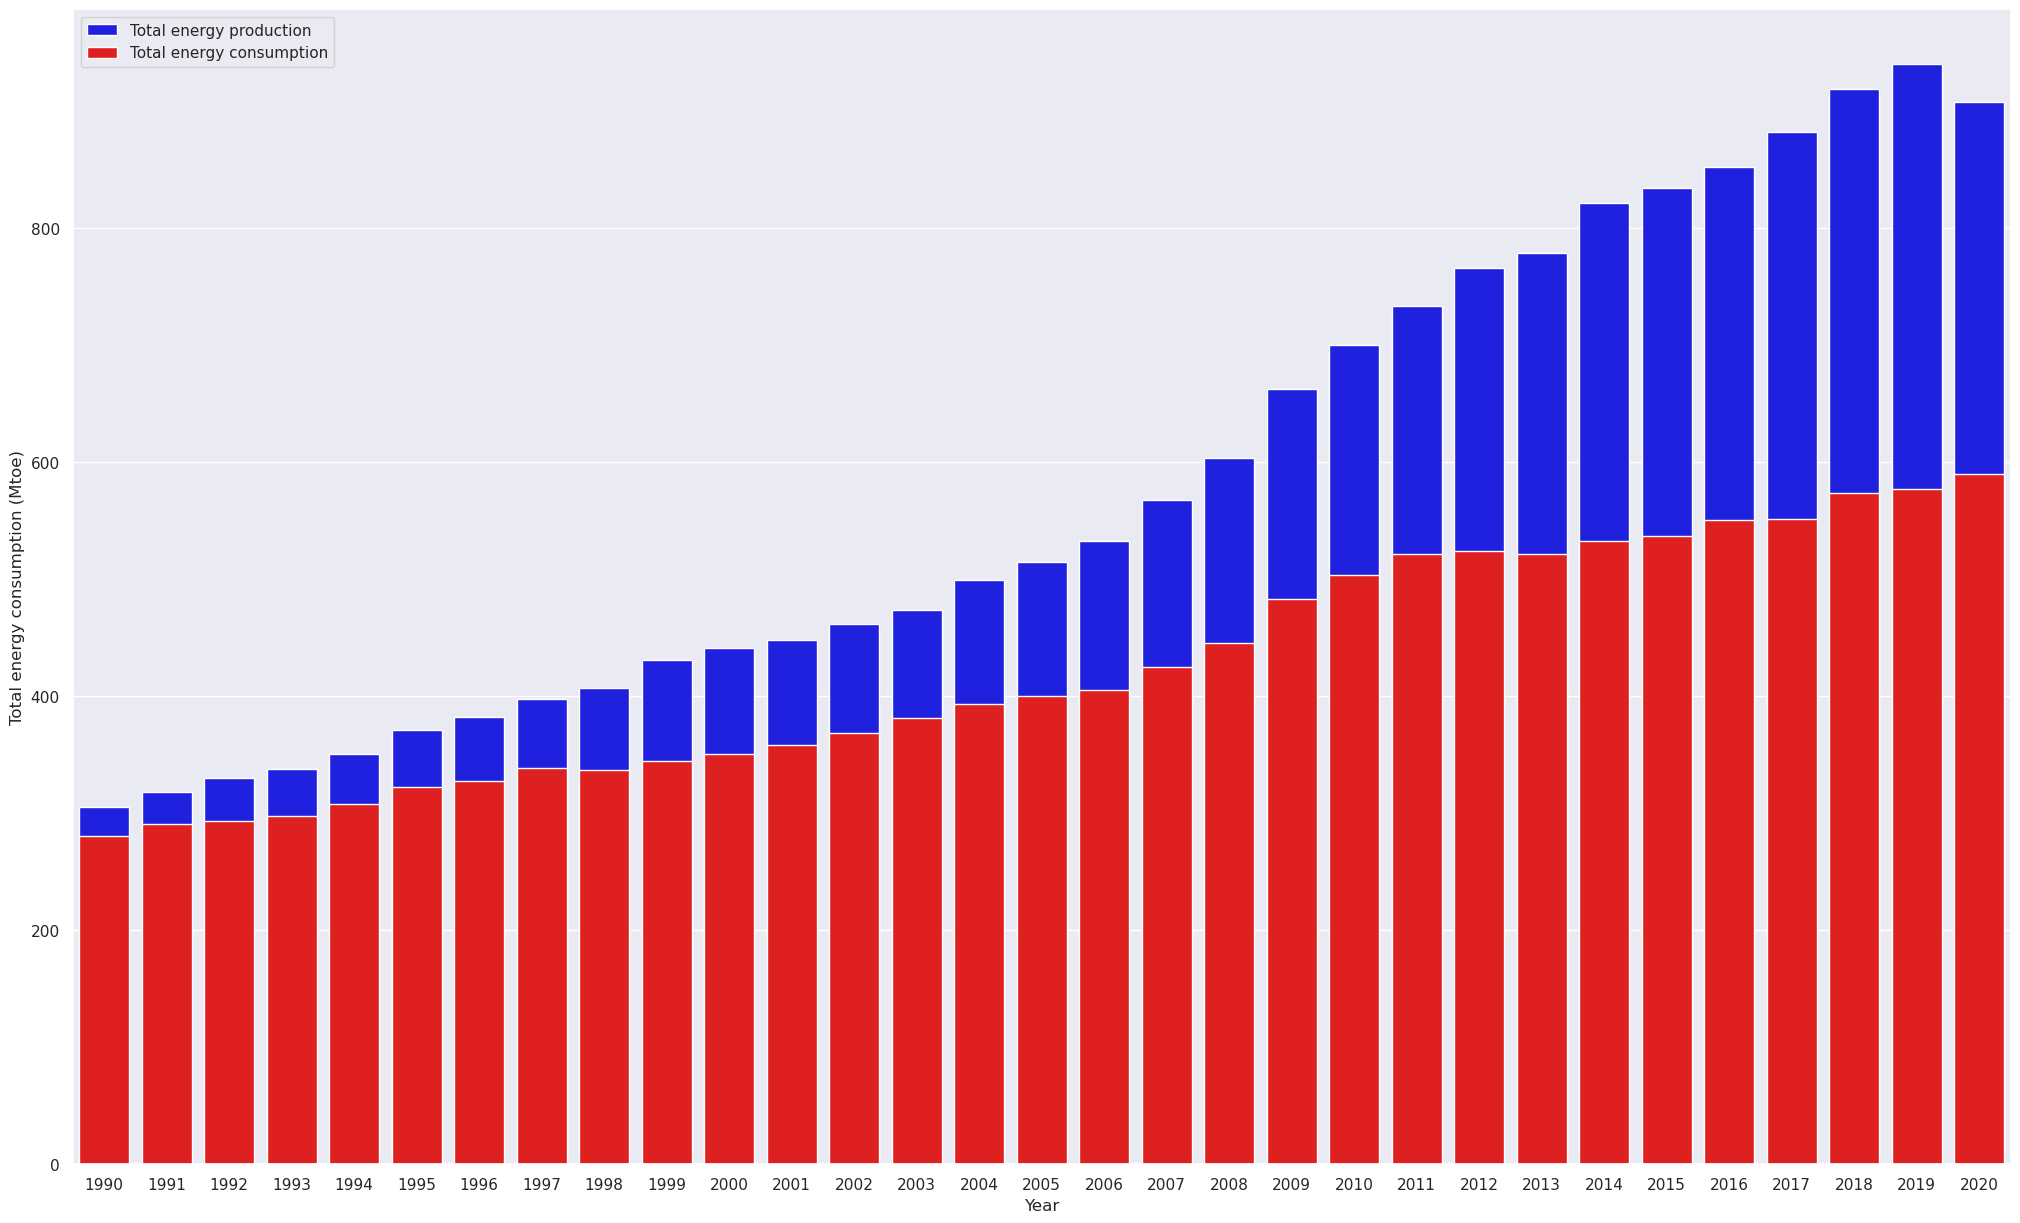

In [77]:
sns.barplot(x='Year',y='Total energy production (Mtoe)',color='blue',data=Indiadf,label='Total energy production')
sns.barplot(x='Year',y='Total energy consumption (Mtoe)',color='red',data=Indiadf,label='Total energy consumption')
plt.legend()
plt.show()

* **Total Energy consumption is less than the total production**

<Axes: title={'center': 'Electricity production of India'}, xlabel='Year', ylabel='Share of renewables in electricity production (%)'>

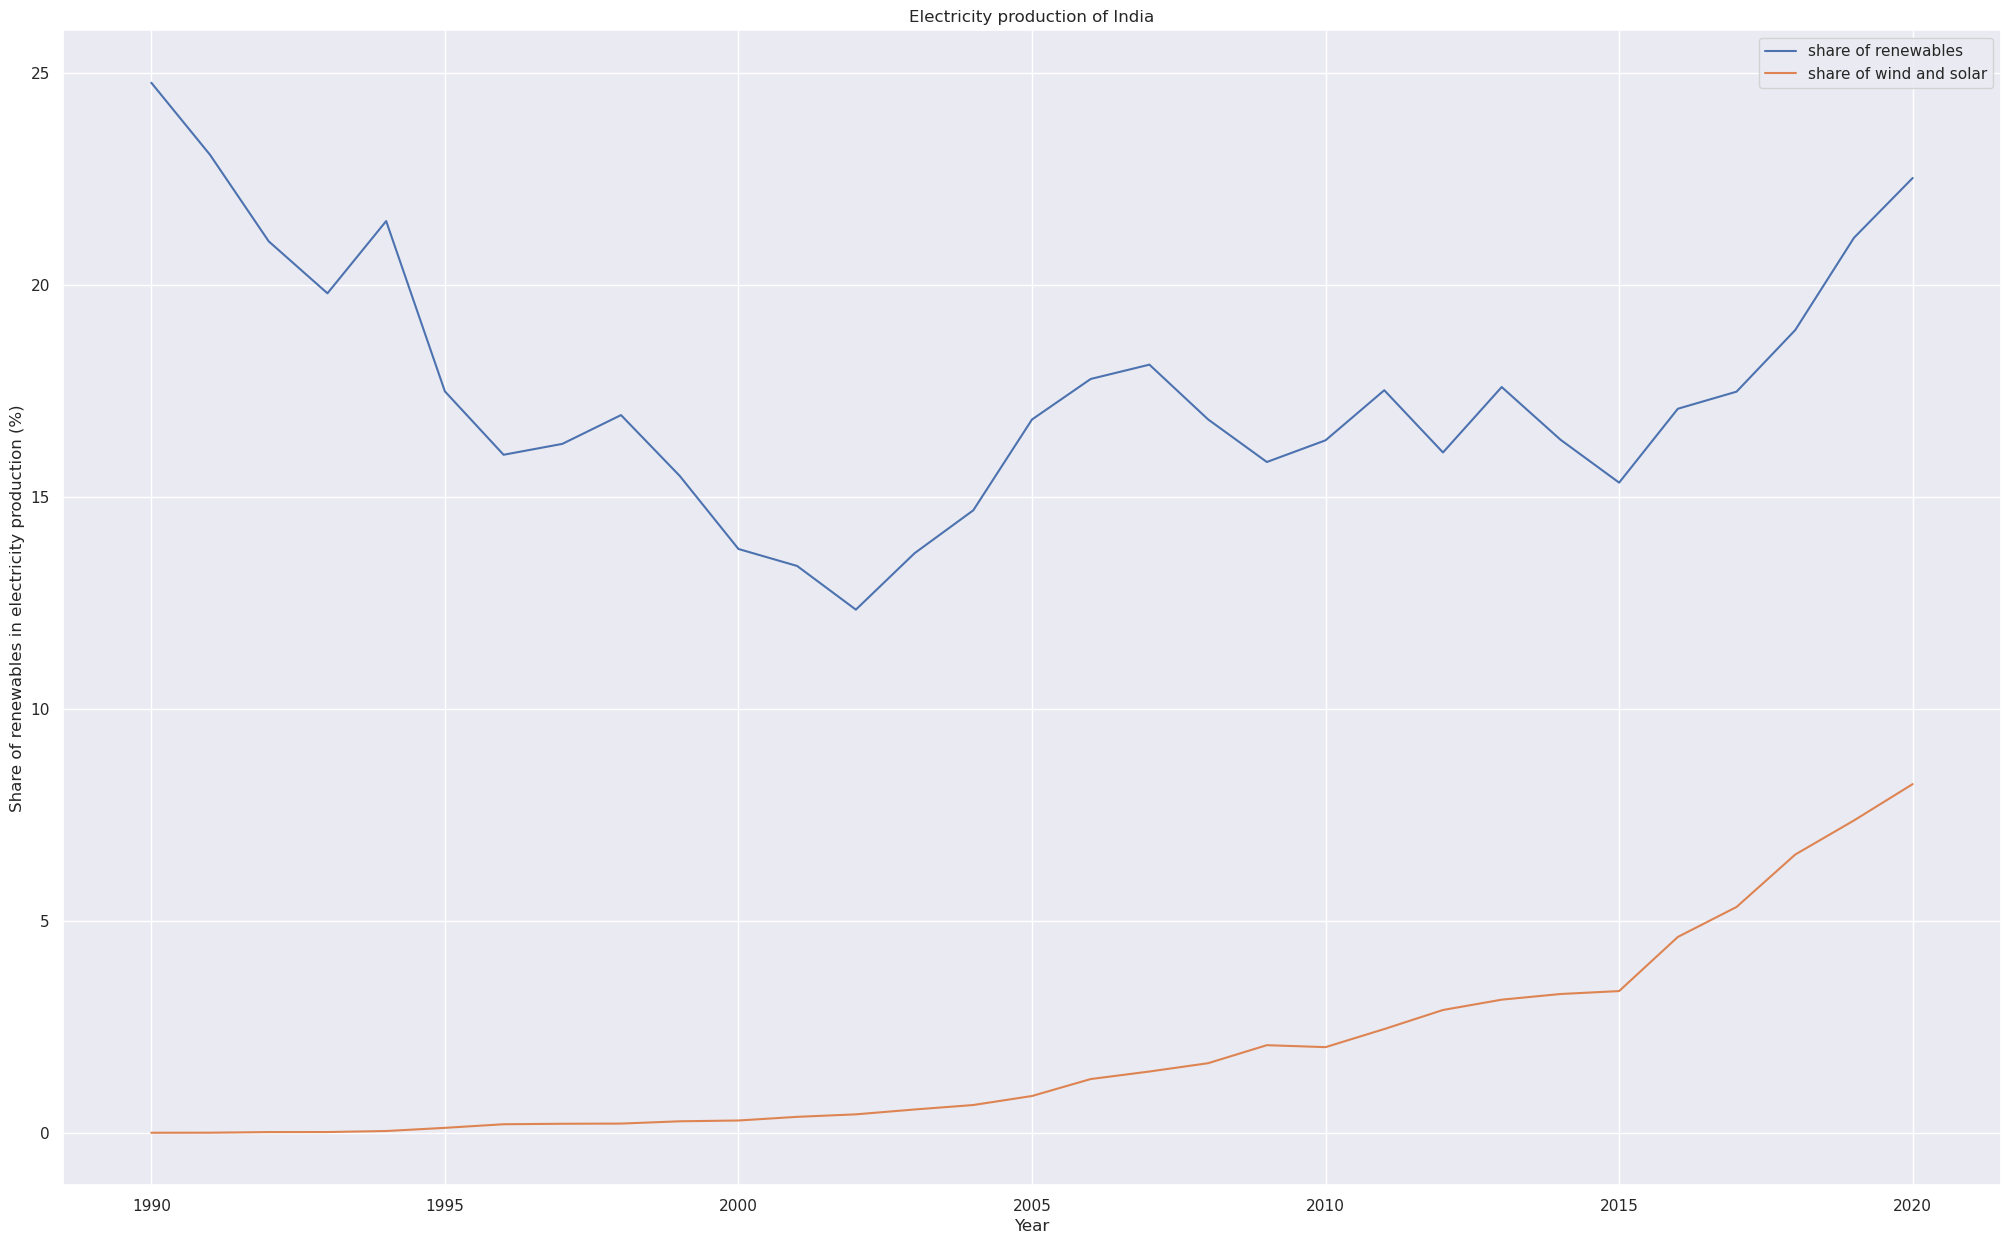

In [98]:
# Electricity production (TWh) 
# Share of renewables in electricity production (%)
# Share of wind and solar in electricity production (%)
plt.title('Electricity production of India')
# sns.lineplot(x='Year',y='Electricity production (TWh)',data=Indiadf)
sns.lineplot(x='Year',y='Share of renewables in electricity production (%)',data=Indiadf,label='share of renewables')
sns.lineplot(x='Year',y='Share of wind and solar in electricity production (%)',data=Indiadf,label='share of wind and solar')

<Axes: title={'center': 'CO2 emission and Oil consumption of India'}, xlabel='Year', ylabel='CO2 emissions from fuel combustion (MtCO2)'>

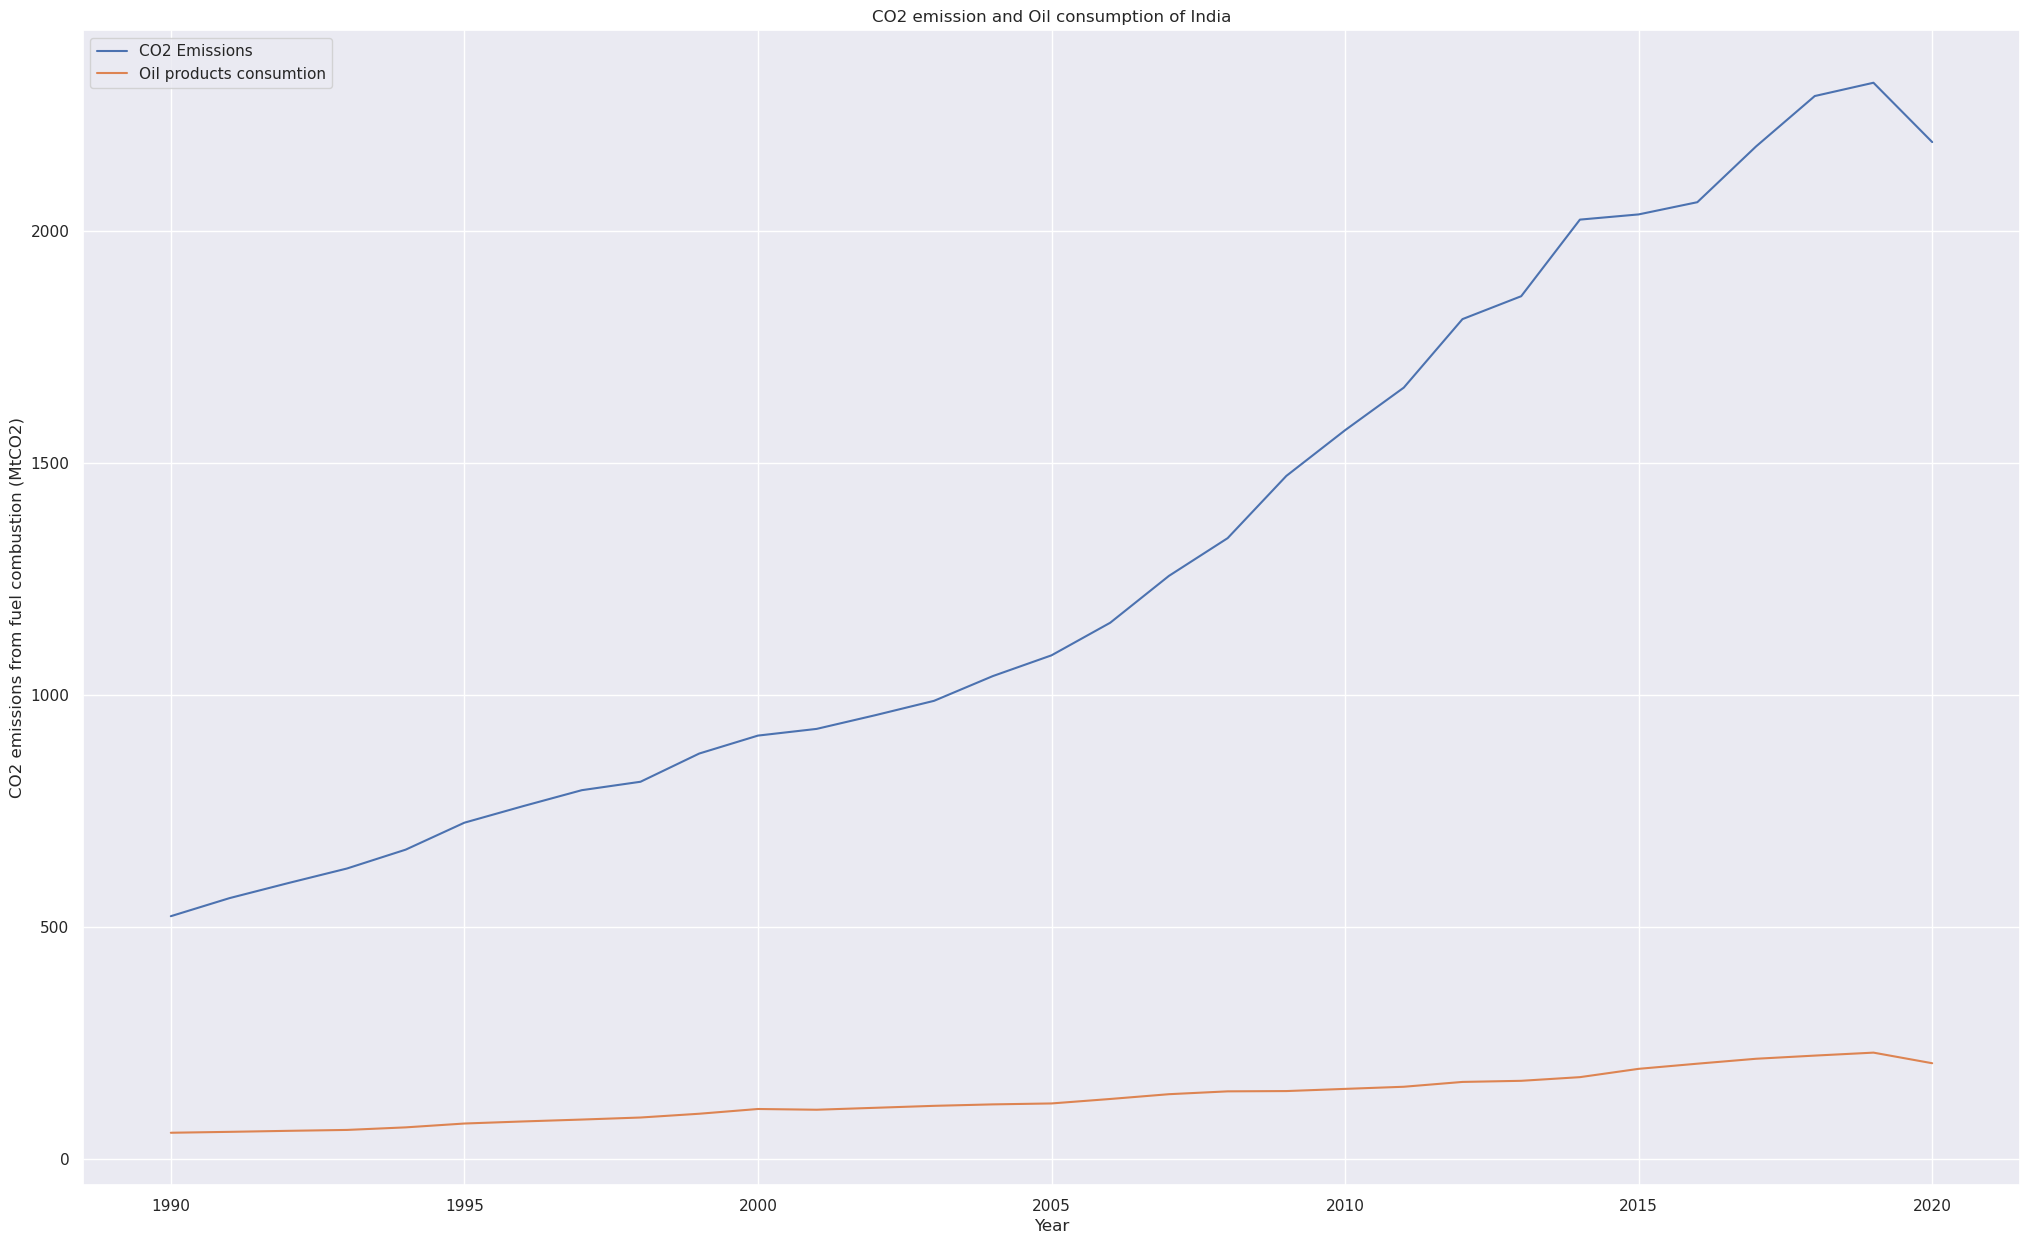

In [100]:
# CO2 emissions from fuel combustion (MtCO2) & Oil products domestic consumption (Mt)

plt.title('CO2 emission and Oil consumption of India')
# sns.lineplot(x='Year',y='Electricity production (TWh)',data=Indiadf)
sns.lineplot(x='Year',y='CO2 emissions from fuel combustion (MtCO2)',data=Indiadf,label='CO2 Emissions')
sns.lineplot(x='Year',y='Oil products domestic consumption (Mt)',data=Indiadf,label='Oil products consumtion')

In [101]:
Indiadf[['CO2 emissions from fuel combustion (MtCO2)','Oil products domestic consumption (Mt)']].corr()

,CO2 emissions from fuel combustion (MtCO2),Oil products domestic consumption (Mt)
CO2 emissions from fuel combustion (MtCO2),1.00000,0.98725
Oil products domestic consumption (Mt),0.98725,1.00000


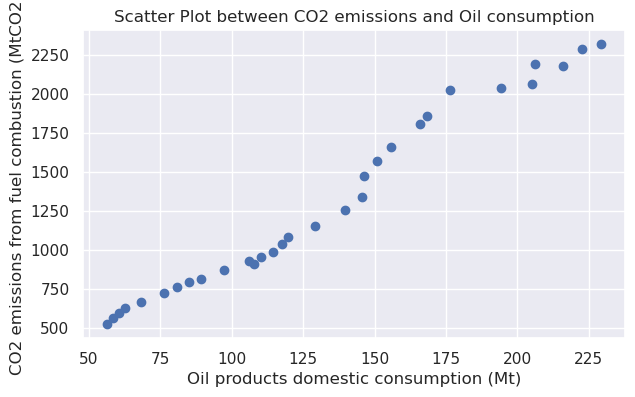

In [47]:
y = Indiadf['CO2 emissions from fuel combustion (MtCO2)']
x = Indiadf['Oil products domestic consumption (Mt)']

plt.figure(figsize=(7,4))
plt.scatter(x, y)
plt.ylabel('CO2 emissions from fuel combustion (MtCO2)')
plt.xlabel('Oil products domestic consumption (Mt)')
plt.title('Scatter Plot between CO2 emissions and Oil consumption')
plt.grid(True)
plt.show()

* A correlation of 0.98 shows that CO2 emissions and Oil products consumption varies linearly. As shown using scatterpot. It emplies that CO2 emission will be more if oil products consumption will be more. 

In [78]:
Indiadf['Electrcity Production through renewable']=Indiadf['Electricity production (TWh)']*(Indiadf['Share of renewables in electricity production (%)']/100)

In [79]:
Indiadf.head()

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy consumption (Mtoe),Total energy production (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity domestic consumption (TWh),Electricity production (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt),Electrcity Production through renewable
403,India,1990,Asia & Pacific,523.096893,1.711269,0.330350,280.491205,305.677685,24.765261,7.391381,56.449,52.201,12.765992,12.944002,0.193044,289.470,211.766,218.234740,0.011055,34.555,225.258,52.444402
404,India,1991,Asia & Pacific,562.048195,1.764870,0.351237,290.513654,318.464315,23.066420,7.853157,58.392,52.213,14.440992,14.490033,0.199016,315.671,232.033,236.717623,0.012355,32.574,245.007,53.521707
405,India,1992,Asia & Pacific,594.465554,1.800821,0.352187,293.713500,330.108152,21.025905,8.171420,60.589,54.435,16.115992,16.700018,0.195570,332.799,247.451,251.135081,0.026442,29.518,255.229,52.028811
406,India,1993,Asia & Pacific,625.865613,1.851429,0.353973,297.574727,338.044637,19.801194,8.716353,62.529,55.305,16.340005,17.094003,0.191189,356.428,266.146,265.246647,0.027776,29.742,262.291,52.700086
407,India,1994,Asia & Pacific,666.503092,1.898860,0.353422,308.234531,351.001673,21.504515,9.125386,68.050,57.490,17.338006,18.176980,0.186123,385.626,289.569,280.487180,0.051864,34.915,271.725,62.270408


In [80]:
Indiadf[['Year','Share of renewables in electricity production (%)','Electricity production (TWh)','Electrcity Production through renewable']]

,Year,Share of renewables in electricity production (%),Electricity production (TWh),Electrcity Production through renewable
403,1990,24.765261,211.766000,52.444402
404,1991,23.066420,232.033000,53.521707
405,1992,21.025905,247.451000,52.028811
406,1993,19.801194,266.146000,52.700086
407,1994,21.504515,289.569000,62.270408
408,1995,17.489656,309.649000,54.156544
409,1996,15.994706,314.976000,50.379486
410,1997,16.251331,334.258000,54.321374
411,1998,16.930523,350.923000,59.413098
412,1999,15.496787,360.356000,55.843602


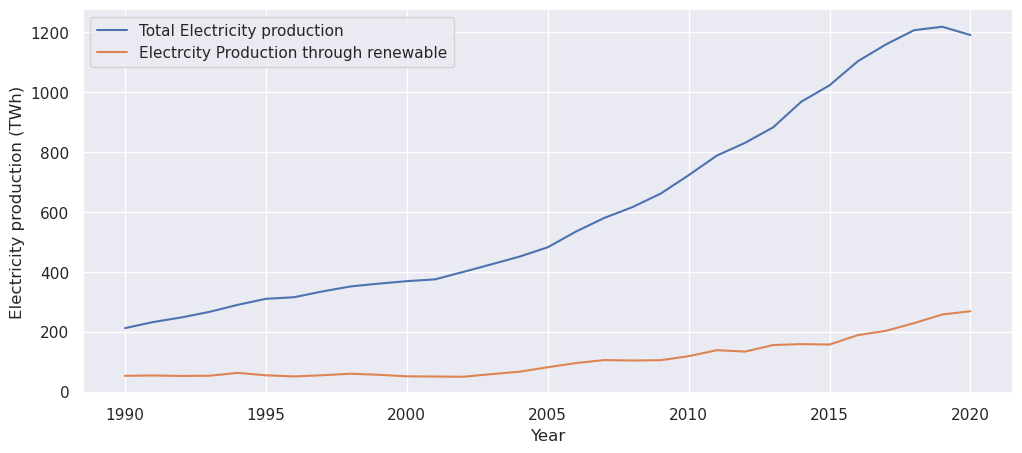

In [81]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Electricity production (TWh)', data=Indiadf, label='Total Electricity production')
sns.lineplot(x='Year',y='Electrcity Production through renewable', data=Indiadf, label='Electrcity Production through renewable')
plt.ylabel('Electricity production (TWh)')
plt.show()